# Temperature Prediction Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn .model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
tp=pd.read_csv("temperature.csv")
tp

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
tp.keys()

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [4]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
tp.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [6]:
tp.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7677.000000  ...  7677.000000  7677.000000  7677.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.262458  ...     1.762807     1.161809     1.206214     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146654  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315697  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.575489  ...     0.018364     0.007896     0.000041    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7725.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.128010   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7725.000000  
mean     22.932220  
std       2.487613  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

In [7]:
tp.shape

(7752, 25)

In [8]:
tp.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [9]:
tp.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

# Data Visualization

In [10]:
tp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<Axes: >

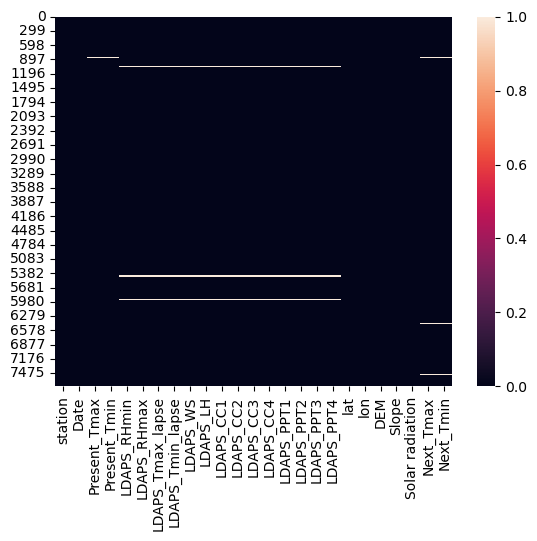

In [11]:
sns.heatmap(tp.isnull())

In [12]:
tp.fillna(0, inplace=True)

In [13]:
tp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<Axes: >

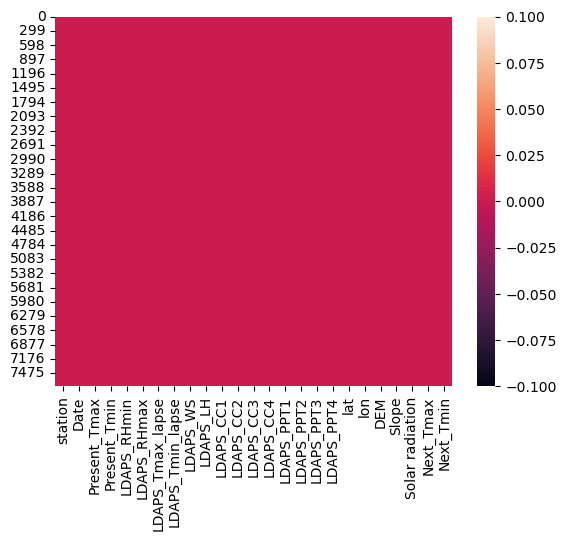

In [14]:
sns.heatmap(tp.isnull())

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

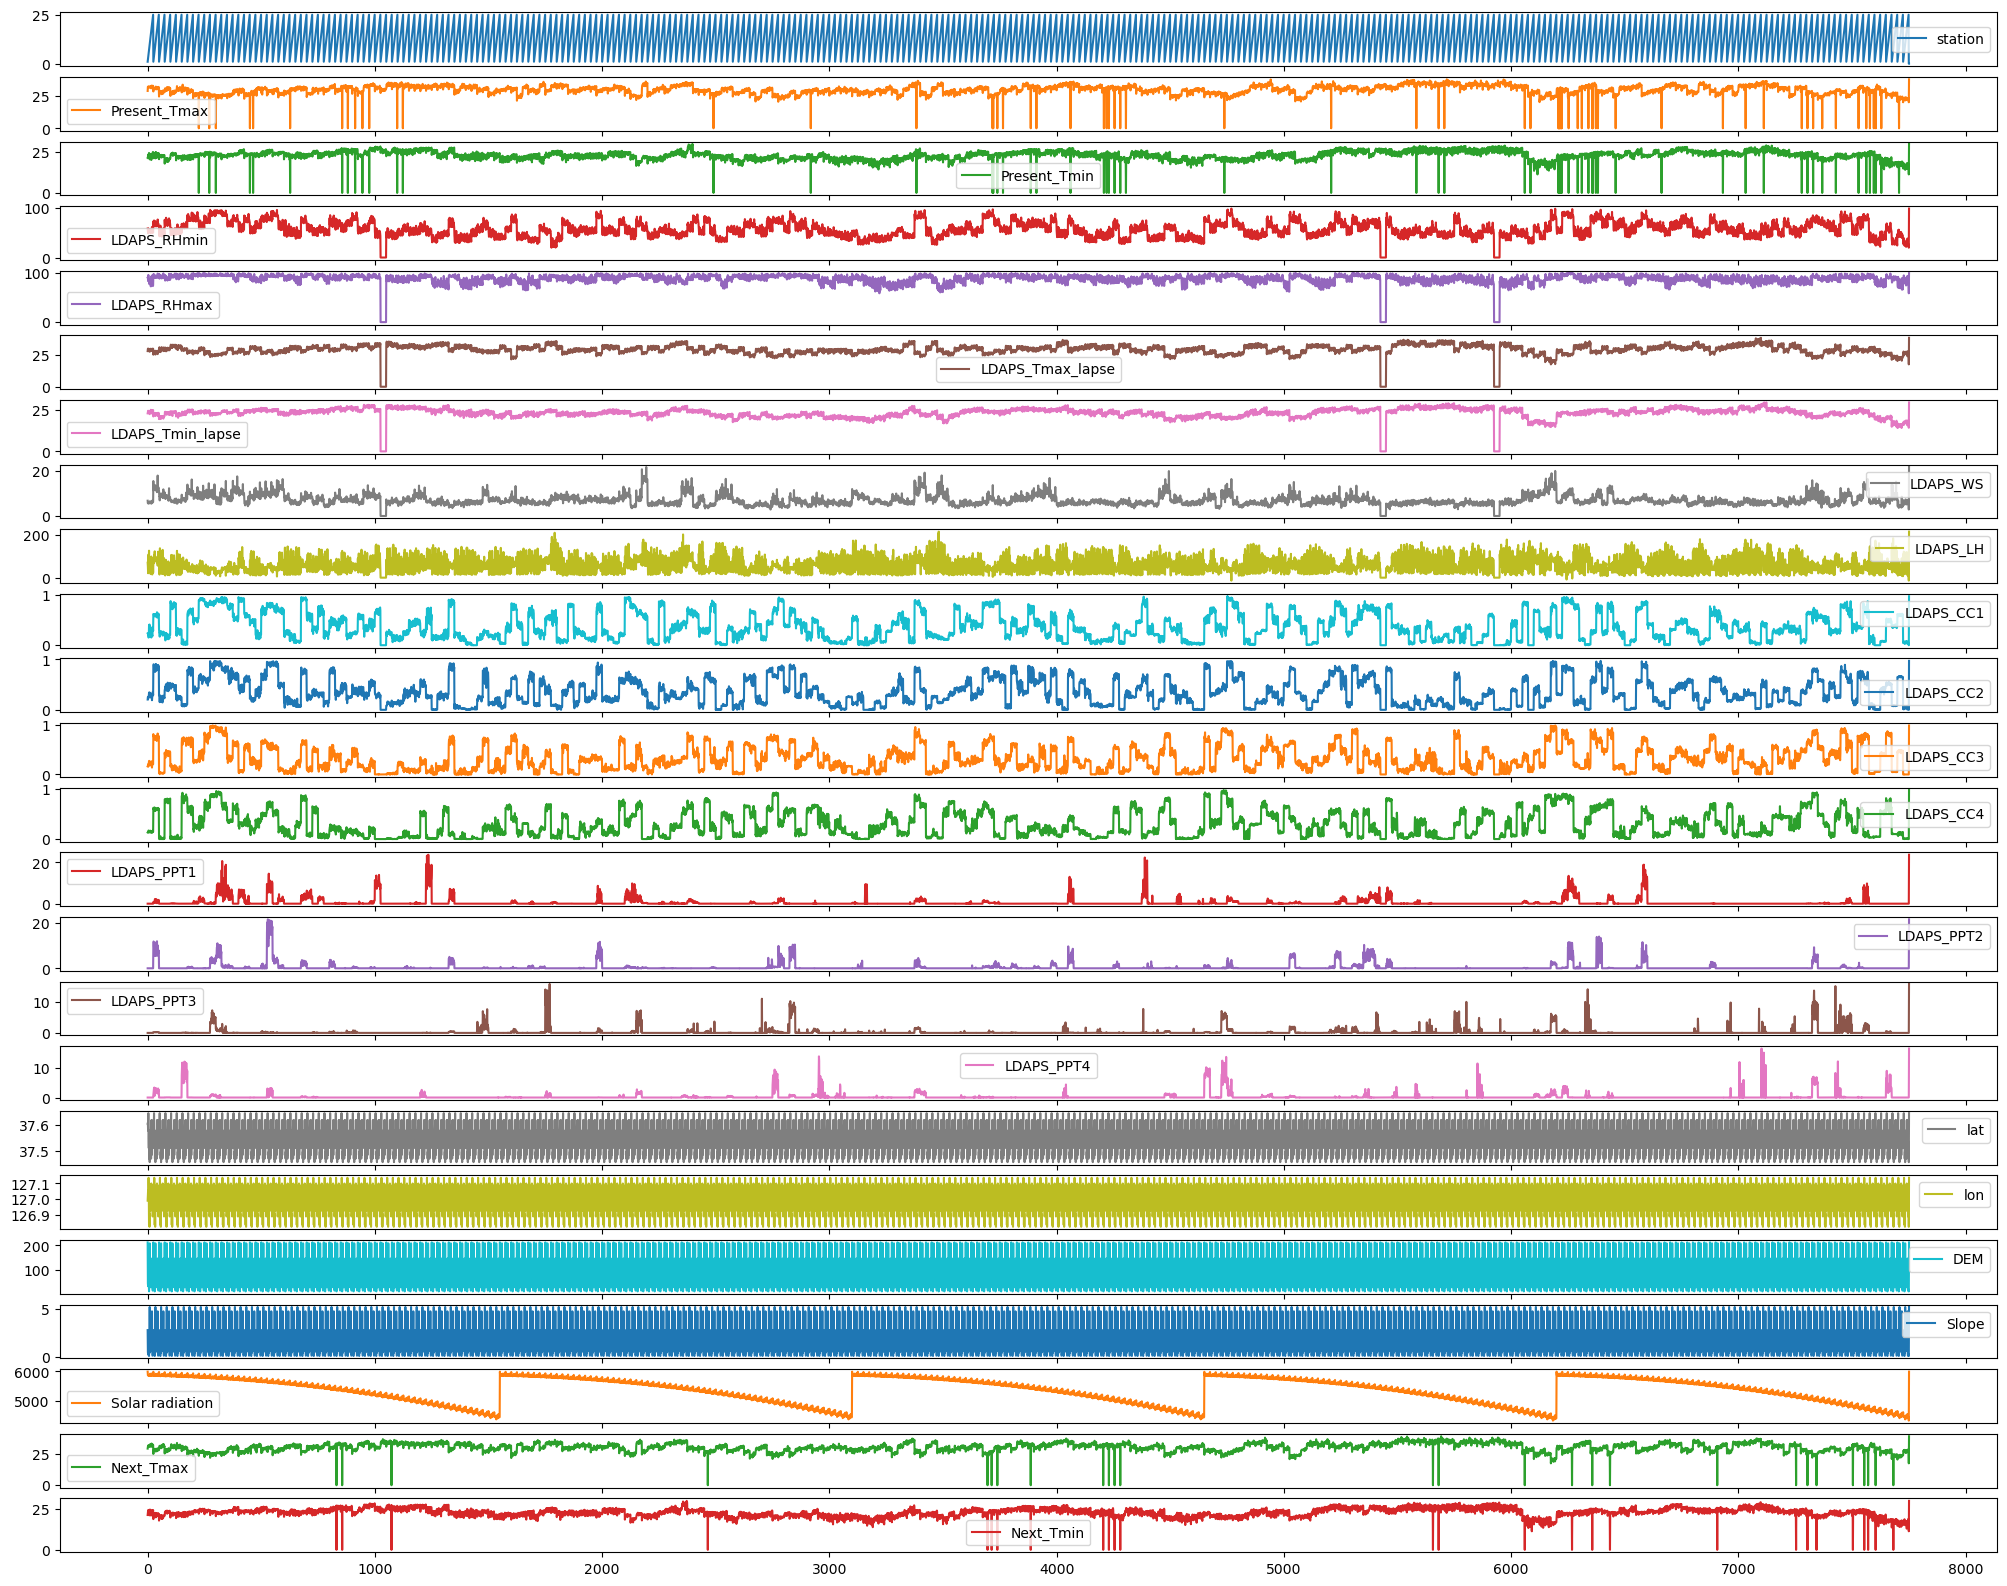

In [15]:
tp.plot(subplots=True, figsize=(25,20))

array([[<Axes: title={'center': 'station'}>,
        <Axes: title={'center': 'Present_Tmax'}>,
        <Axes: title={'center': 'Present_Tmin'}>,
        <Axes: title={'center': 'LDAPS_RHmin'}>,
        <Axes: title={'center': 'LDAPS_RHmax'}>],
       [<Axes: title={'center': 'LDAPS_Tmax_lapse'}>,
        <Axes: title={'center': 'LDAPS_Tmin_lapse'}>,
        <Axes: title={'center': 'LDAPS_WS'}>,
        <Axes: title={'center': 'LDAPS_LH'}>,
        <Axes: title={'center': 'LDAPS_CC1'}>],
       [<Axes: title={'center': 'LDAPS_CC2'}>,
        <Axes: title={'center': 'LDAPS_CC3'}>,
        <Axes: title={'center': 'LDAPS_CC4'}>,
        <Axes: title={'center': 'LDAPS_PPT1'}>,
        <Axes: title={'center': 'LDAPS_PPT2'}>],
       [<Axes: title={'center': 'LDAPS_PPT3'}>,
        <Axes: title={'center': 'LDAPS_PPT4'}>,
        <Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lon'}>,
        <Axes: title={'center': 'DEM'}>],
       [<Axes: title={'center': 'Slope'}>,
        <Axes: 

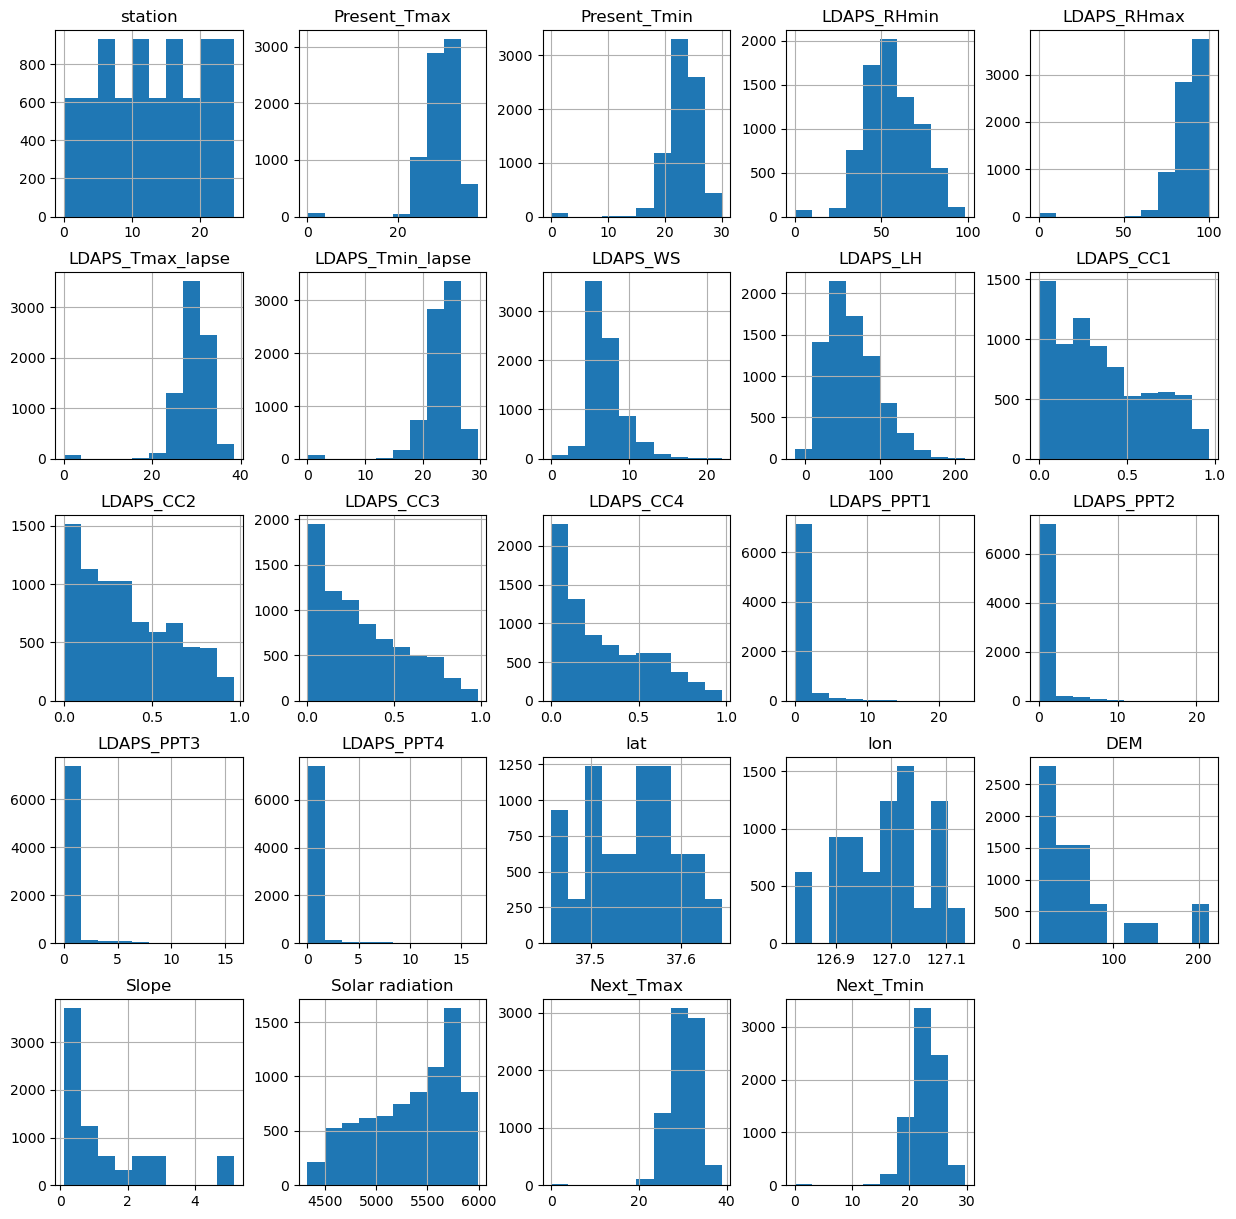

In [16]:
tp.hist(bins=10,figsize=(15,15))

37.5776    1240
37.5507    1240
37.6046     620
37.5102     620
37.4697     620
37.4967     620
37.5372     620
37.6181     620
37.5237     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64

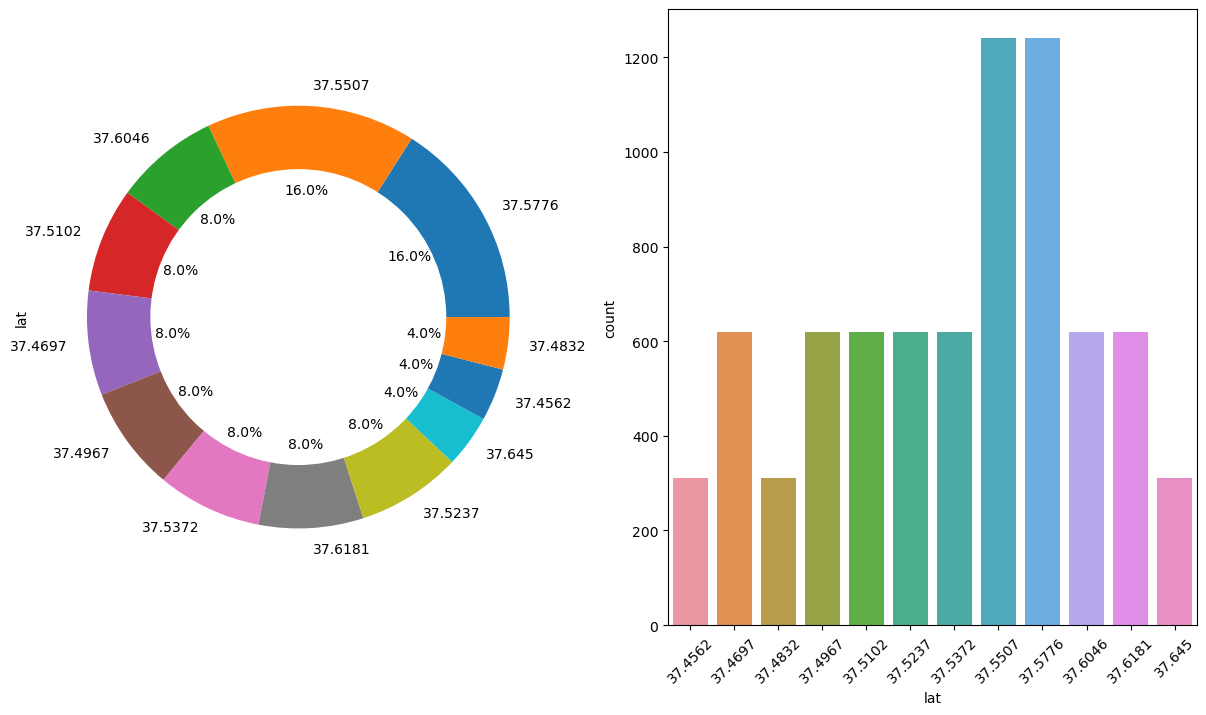

In [17]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
tp['lat'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='lat',data=tp)
plt.xticks(rotation=45)
tp['lat'].value_counts()

1.0     310
2.0     310
25.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
14.0    310
13.0    310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
0.0       2
Name: station, dtype: int64

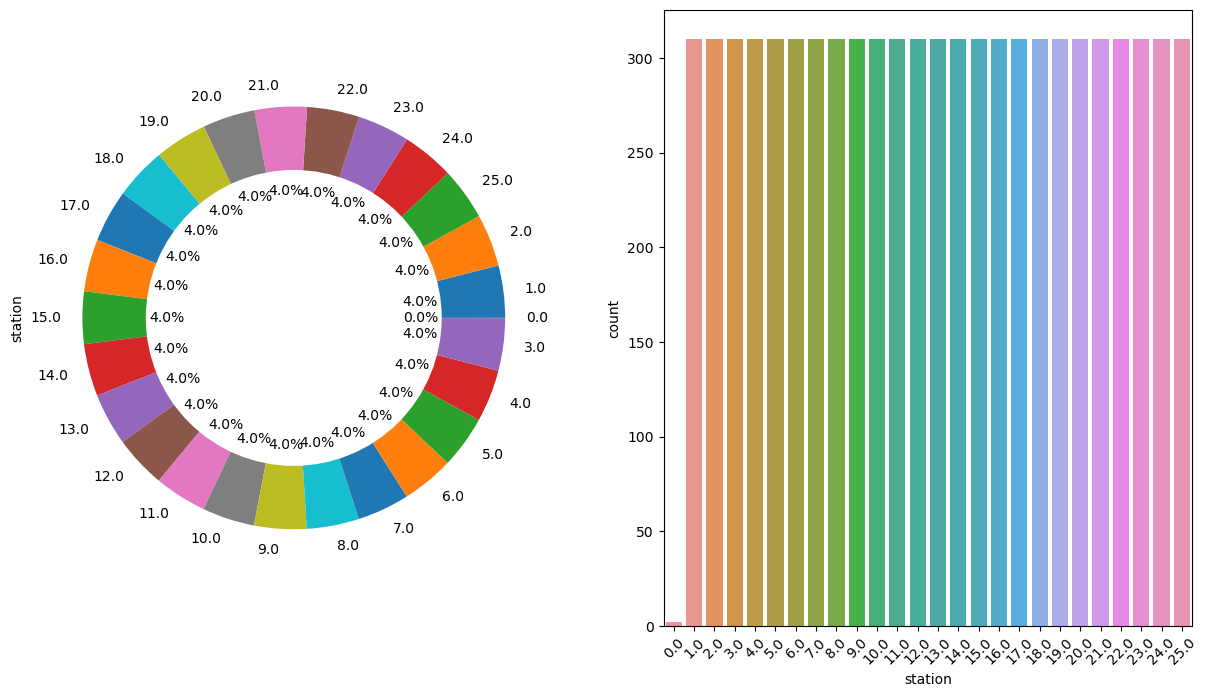

In [18]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
tp['station'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='station',data=tp)
plt.xticks(rotation=45)
tp['station'].value_counts()

There are 12 latitudes present, two of which have the highest count equal to 1240 while 7 of them have 620 counts and rest 3 have less than 350 counts.

Minimum Tmax is 0.0 and Maximum Tmax is 37.6
Minimum Tmin is 0.0 and Maximum Tmin is 29.9


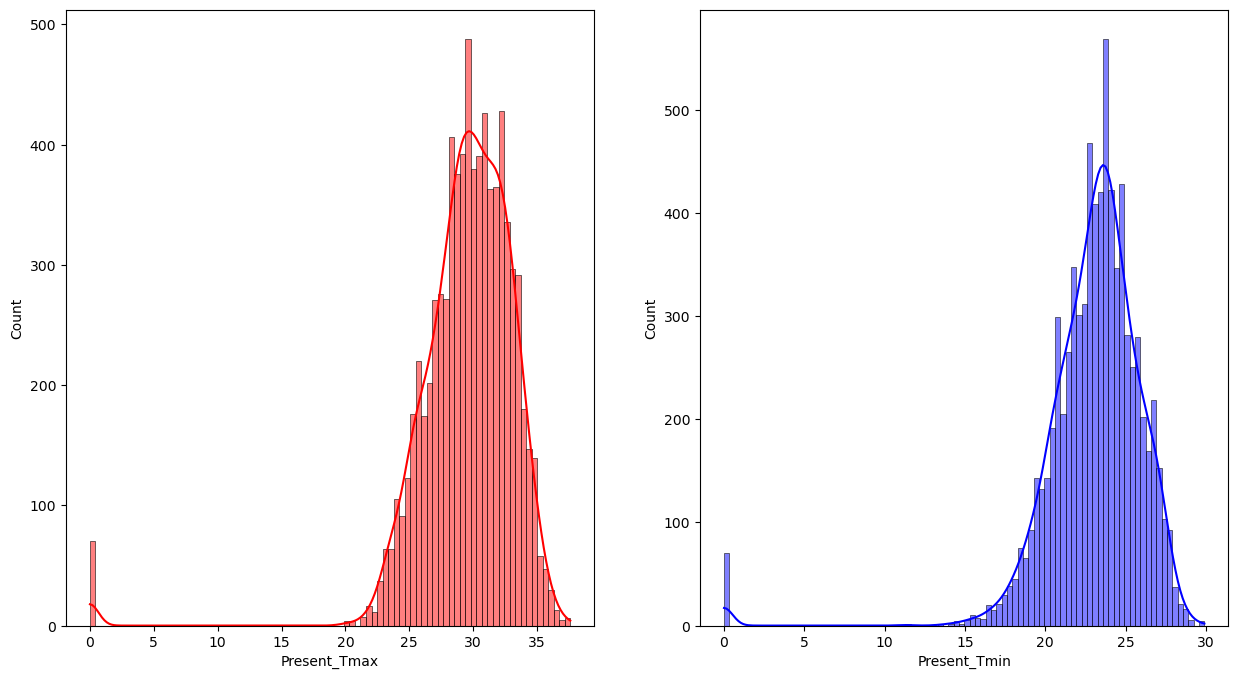

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(tp['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(tp['Present_Tmin'],kde=True,color='b')
print('Minimum Tmax is {} and Maximum Tmax is {}'.format(tp['Present_Tmax'].min(),tp['Present_Tmax'].max()))
print('Minimum Tmin is {} and Maximum Tmin is {}'.format(tp['Present_Tmin'].min(),tp['Present_Tmin'].max()))

Present Tmax and Tmin are almost normally distibuted, Tmax have highest temp as 37.6 and min as 20, most of the days have tmax equal to 28.5, while Tmin have highest temp as 29.9 and min as 11.3, most of the days have tmin equal to 23.

Minimum RHmax is 0.0 and Maximum RHmax is 100.0001526
Minimum RHmin is 0.0 and Maximum RHmin is 98.5247345


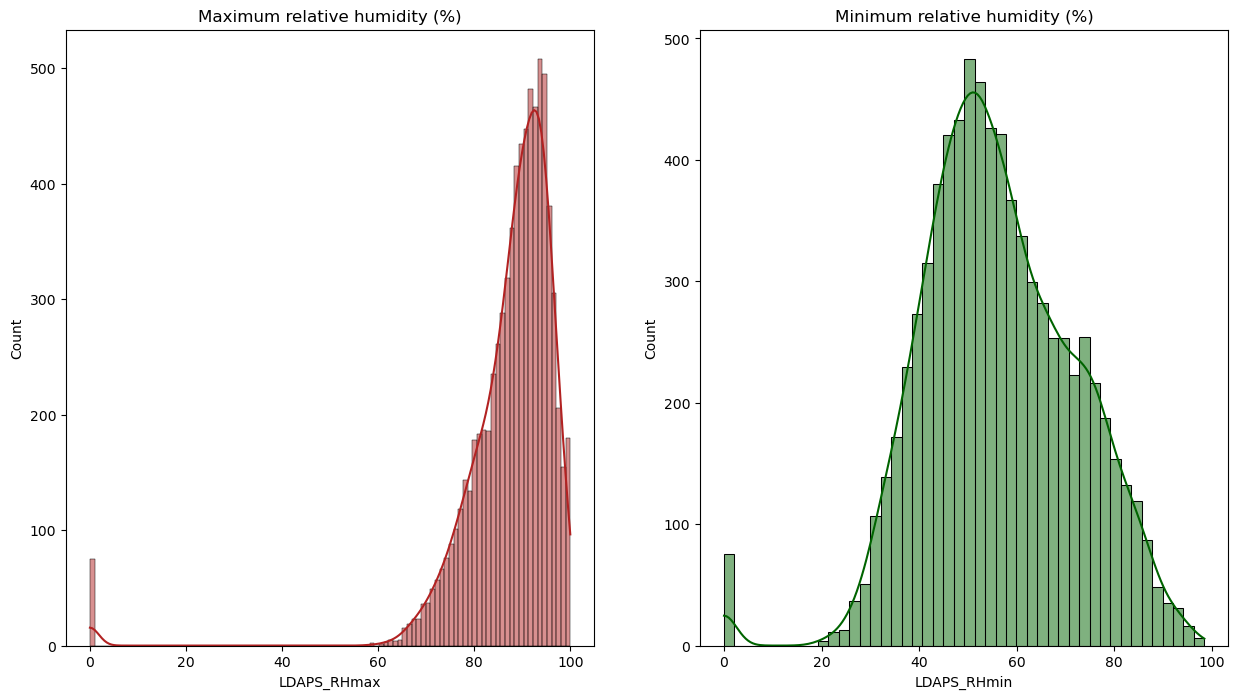

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(tp['LDAPS_RHmax'],kde=True,color='firebrick')
plt.title('Maximum relative humidity (%)')
plt.subplot(1,2,2)
sns.histplot(tp['LDAPS_RHmin'],kde=True,color='darkgreen')
plt.title('Minimum relative humidity (%)')
print('Minimum RHmax is {} and Maximum RHmax is {}'.format(tp['LDAPS_RHmax'].min(),tp['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} and Maximum RHmin is {}'.format(tp['LDAPS_RHmin'].min(),tp['LDAPS_RHmin'].max()))

Data of Maximum relative humidity is left skewed and Data of Maximum relative humidity is slightly right skewed. LDAPS_RHmax for most of the days lie in the range 92 to 97 while LDAPS_RHmin lies in the range 45 to 62.

Minimum Tmax applied lapse rate is 0.0 and Maximum Tmax applied lapse rate is 38.54225522
Minimum Tmin is applied lapse rate 0.0 and Maximum Tmin applied lapse rate is 29.61934244


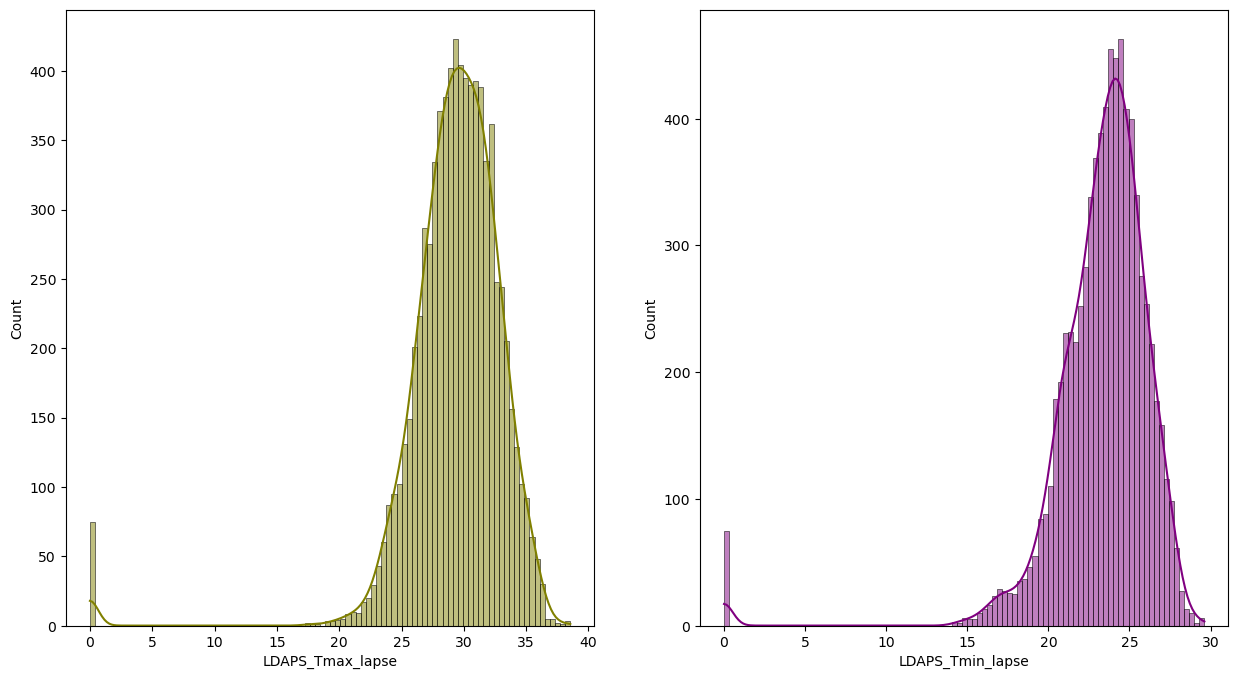

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(tp['LDAPS_Tmax_lapse'],kde=True,color='olive')
plt.subplot(1,2,2)
sns.histplot(tp['LDAPS_Tmin_lapse'],kde=True,color='purple')
print('Minimum Tmax applied lapse rate is {} and Maximum Tmax applied lapse rate is {}'.format(tp['LDAPS_Tmax_lapse'].min(),tp['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} and Maximum Tmin applied lapse rate is {}'.format(tp['LDAPS_Tmin_lapse'].min(),tp['LDAPS_Tmin_lapse'].max()))

Tmax and Tmin for applied lapse rate are almost normally distributed, with Tmax_lapse having maximum at 38.54 , minimum at 17.62 and for majority of days its values lies in the range 27 to 32 while Tmin_lapse having maximum at 29.61 , minimum at 14.27 and for majority of days its values lies in the range 23 to 26

Minimum 0.0
Maximum 21.85762099


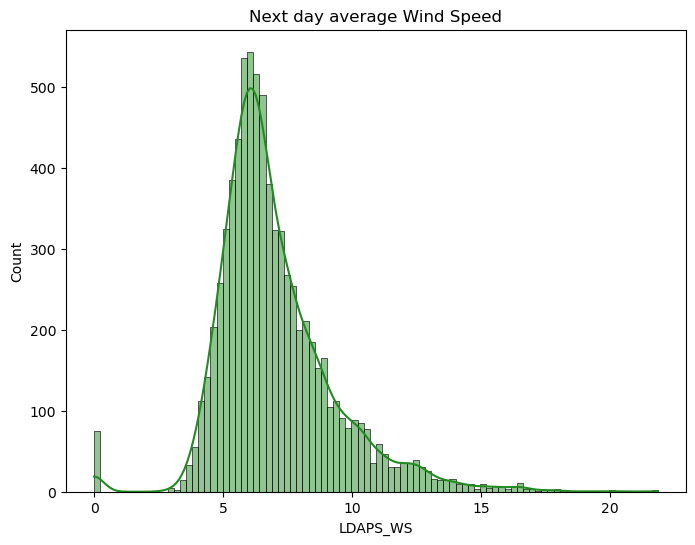

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(tp['LDAPS_WS'],kde=True,color='forestgreen')
plt.title('Next day average Wind Speed')
print('Minimum',tp['LDAPS_WS'].min())
print('Maximum',tp['LDAPS_WS'].max())

Minimum -13.60321209
Maximum 213.4140062


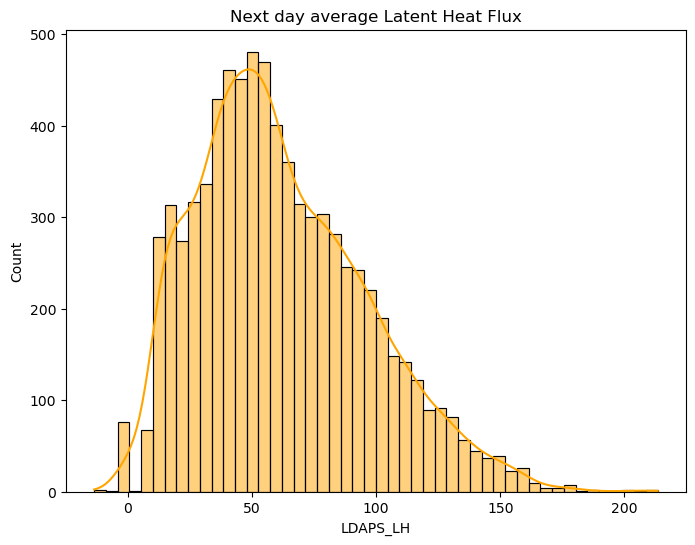

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(tp['LDAPS_LH'],kde=True,color='orange')
plt.title('Next day average Latent Heat Flux')
print('Minimum',tp['LDAPS_LH'].min())
print('Maximum',tp['LDAPS_LH'].max())

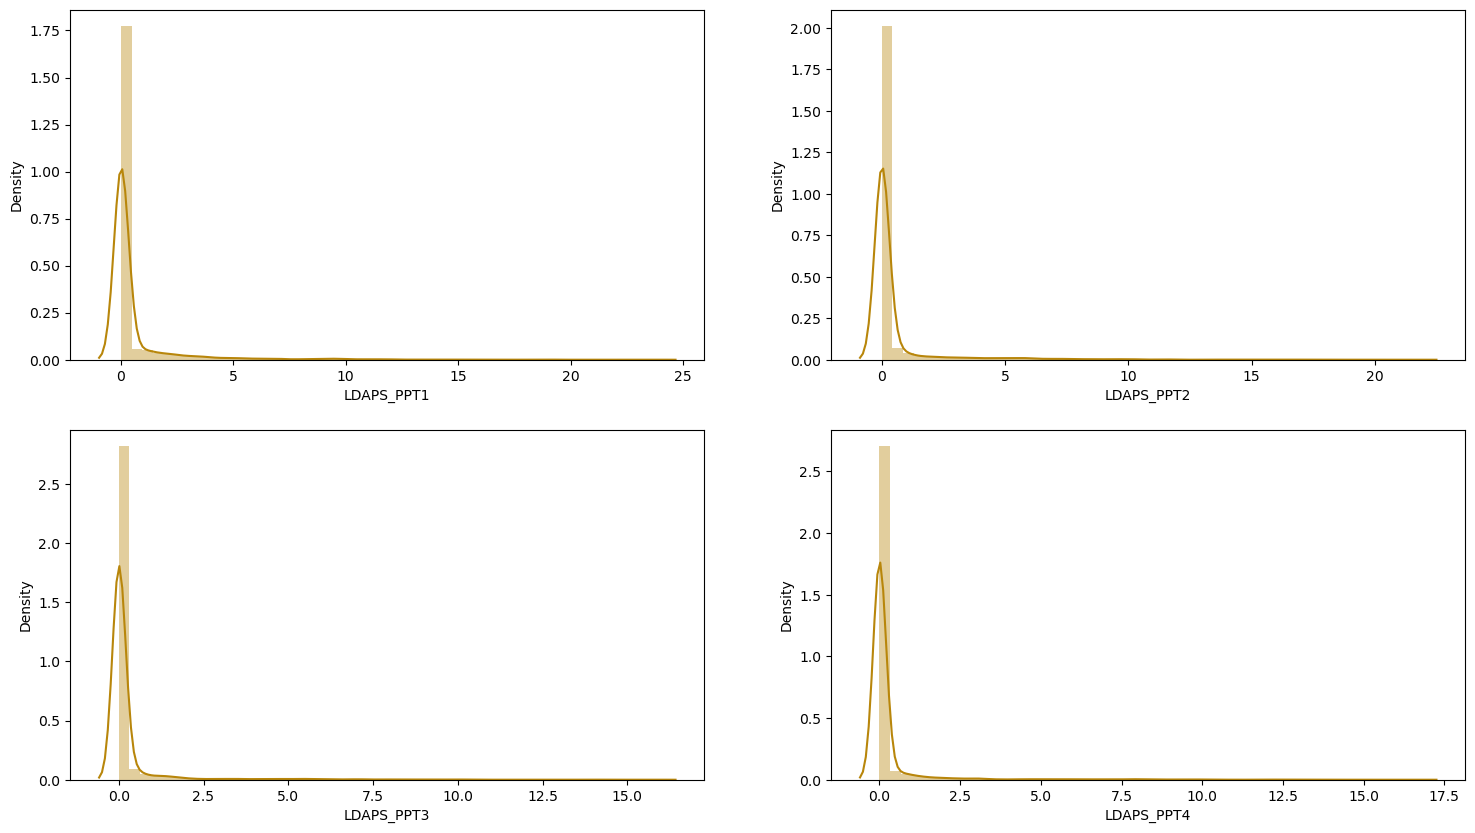

In [25]:
precipitation=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
fig,ax=plt.subplots(2,2,figsize=(18,10))
r=0
c=0
for i, n in enumerate(precipitation):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(tp[n],color='darkgoldenrod',ax=ax[r,c])
    c+=1

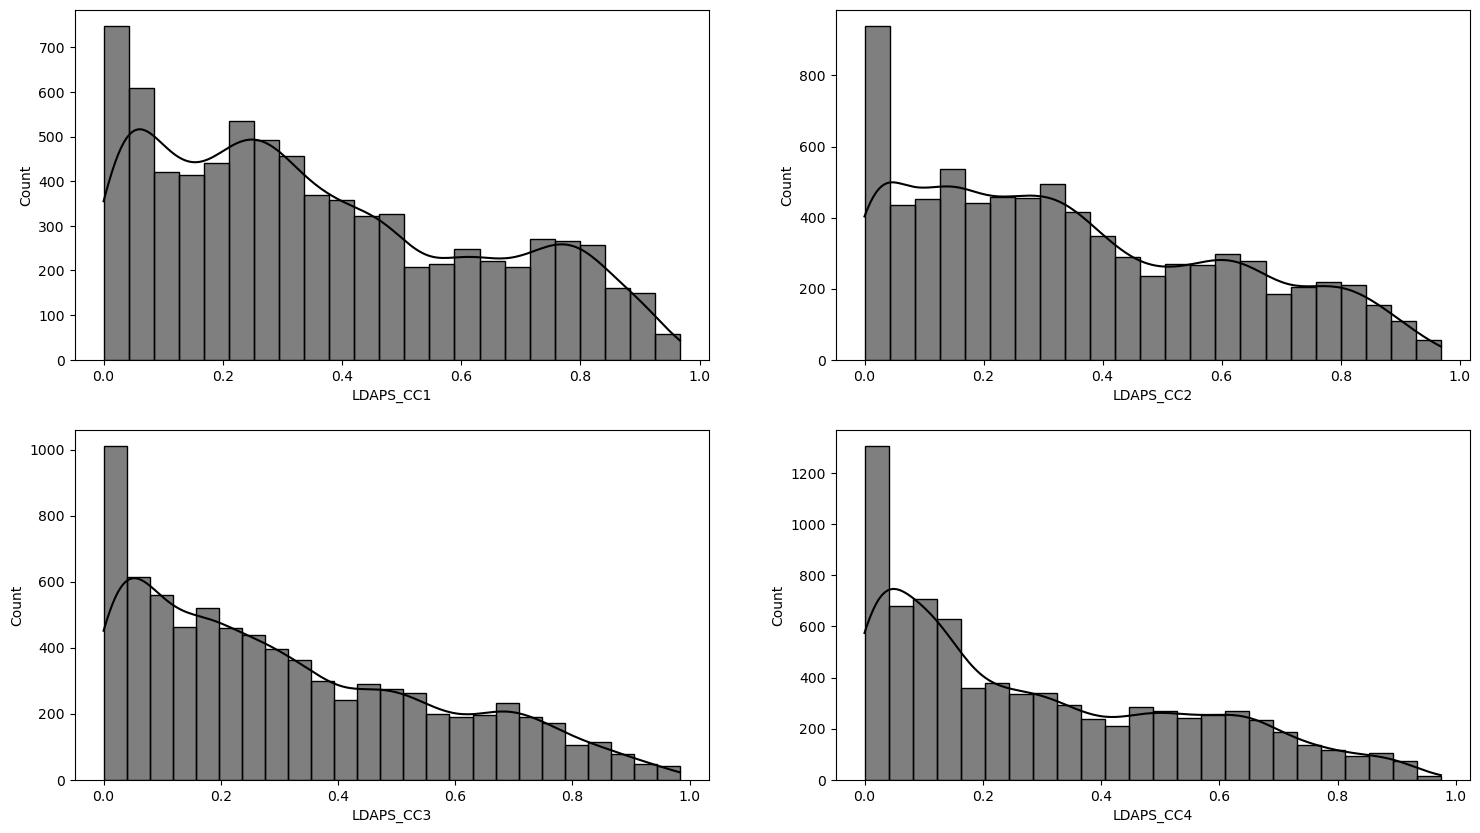

In [24]:
cloud_cover=['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']
fig,ax=plt.subplots(2,2,figsize=(18,10))
r=0
c=0
for i, n in enumerate(cloud_cover):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.histplot(tp[n],kde=True,color='k',ax=ax[r,c])
    c+=1

<Axes: xlabel='station', ylabel='Next_Tmax'>

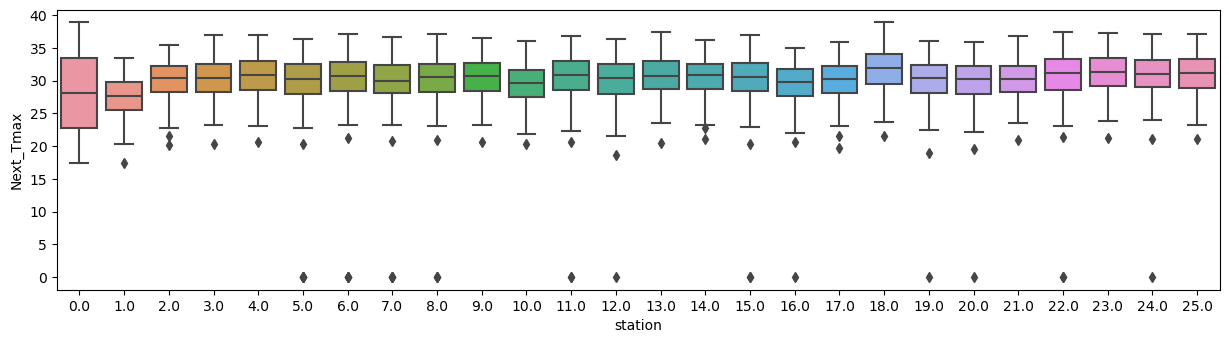

In [27]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=tp)

Minimum 4329.520508
Maximum 5992.895996


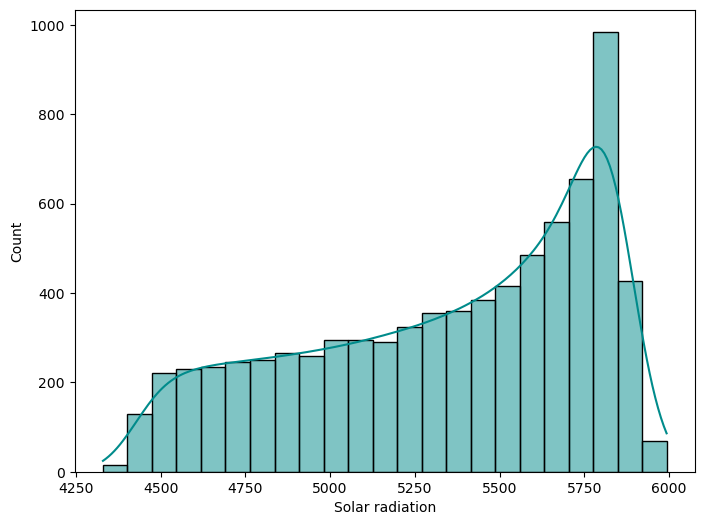

In [26]:
plt.figure(figsize=(8,6))
sns.histplot(tp['Solar radiation'],kde=True,color='darkcyan')
print('Minimum',tp['Solar radiation'].min())
print('Maximum',tp['Solar radiation'].max())


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '37.4562'),
  Text(1, 0, '37.4697'),
  Text(2, 0, '37.4832'),
  Text(3, 0, '37.4967'),
  Text(4, 0, '37.5102'),
  Text(5, 0, '37.5237'),
  Text(6, 0, '37.5372'),
  Text(7, 0, '37.5507'),
  Text(8, 0, '37.5776'),
  Text(9, 0, '37.6046'),
  Text(10, 0, '37.6181'),
  Text(11, 0, '37.645')])

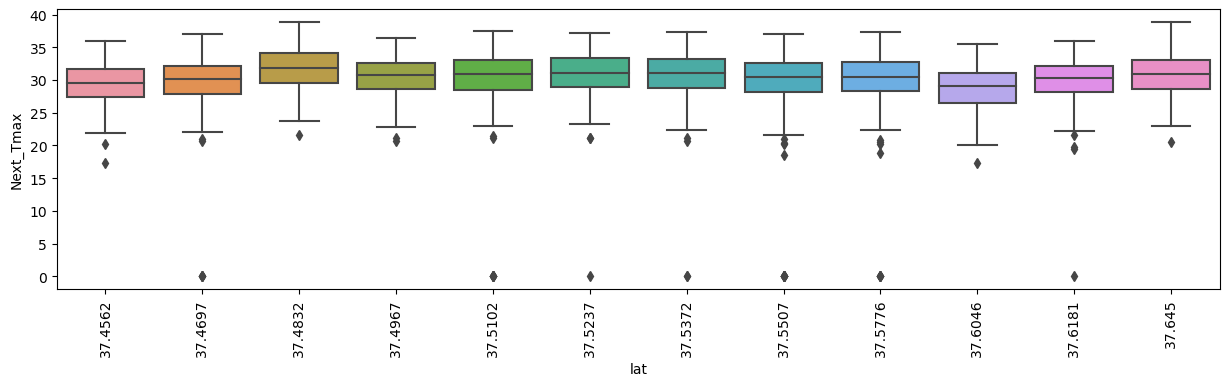

In [29]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=tp)
plt.xticks(rotation=90)

<Axes: xlabel='station', ylabel='Next_Tmin'>

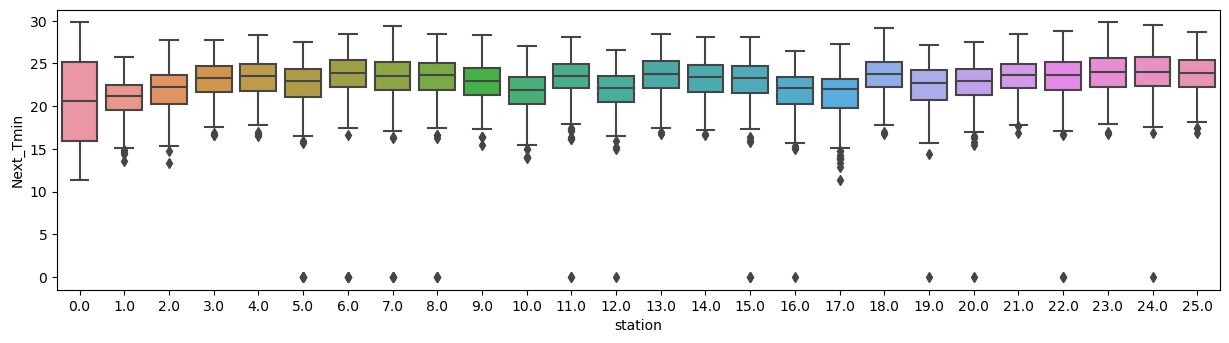

In [28]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=tp)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '126.826'),
  Text(1, 0, '126.838'),
  Text(2, 0, '126.891'),
  Text(3, 0, '126.909'),
  Text(4, 0, '126.91'),
  Text(5, 0, '126.927'),
  Text(6, 0, '126.937'),
  Text(7, 0, '126.938'),
  Text(8, 0, '126.955'),
  Text(9, 0, '126.97'),
  Text(10, 0, '126.988'),
  Text(11, 0, '126.991'),
  Text(12, 0, '126.995'),
  Text(13, 0, '127.004'),
  Text(14, 0, '127.022'),
  Text(15, 0, '127.024'),
  Text(16, 0, '127.032'),
  Text(17, 0, '127.04'),
  Text(18, 0, '127.042'),
  Text(19, 0, '127.058'),
  Text(20, 0, '127.083'),
  Text(21, 0, '127.085'),
  Text(22, 0, '127.086'),
  Text(23, 0, '127.099'),
  Text(24, 0, '127.135')])

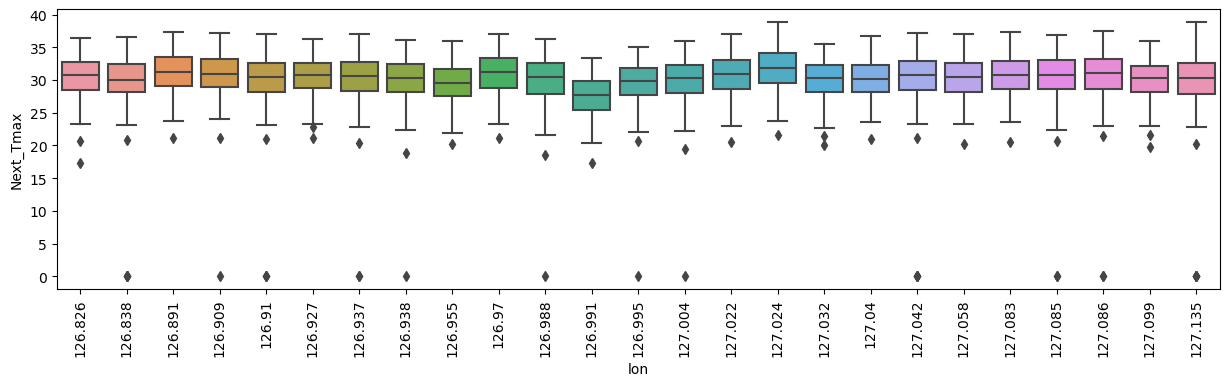

In [31]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data=tp)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '37.4562'),
  Text(1, 0, '37.4697'),
  Text(2, 0, '37.4832'),
  Text(3, 0, '37.4967'),
  Text(4, 0, '37.5102'),
  Text(5, 0, '37.5237'),
  Text(6, 0, '37.5372'),
  Text(7, 0, '37.5507'),
  Text(8, 0, '37.5776'),
  Text(9, 0, '37.6046'),
  Text(10, 0, '37.6181'),
  Text(11, 0, '37.645')])

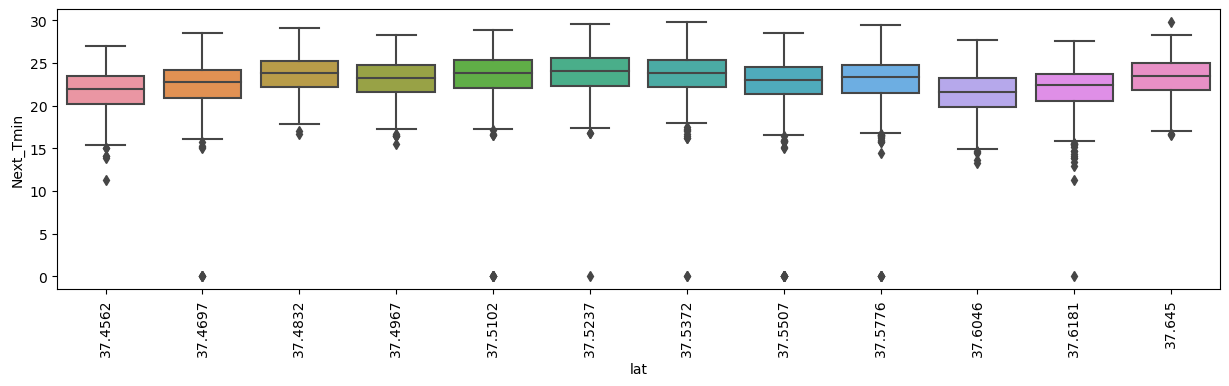

In [30]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=tp)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '12.37'),
  Text(1, 0, '15.5876'),
  Text(2, 0, '17.2956'),
  Text(3, 0, '19.5844'),
  Text(4, 0, '21.9668'),
  Text(5, 0, '26.298'),
  Text(6, 0, '28.7'),
  Text(7, 0, '30.0464'),
  Text(8, 0, '30.968'),
  Text(9, 0, '33.3068'),
  Text(10, 0, '35.038'),
  Text(11, 0, '44.7624'),
  Text(12, 0, '45.716'),
  Text(13, 0, '50.9312'),
  Text(14, 0, '52.518'),
  Text(15, 0, '53.4712'),
  Text(16, 0, '54.6384'),
  Text(17, 0, '56.4448'),
  Text(18, 0, '59.8324'),
  Text(19, 0, '75.0924'),
  Text(20, 0, '82.2912'),
  Text(21, 0, '132.118'),
  Text(22, 0, '146.554'),
  Text(23, 0, '208.507'),
  Text(24, 0, '212.335')])

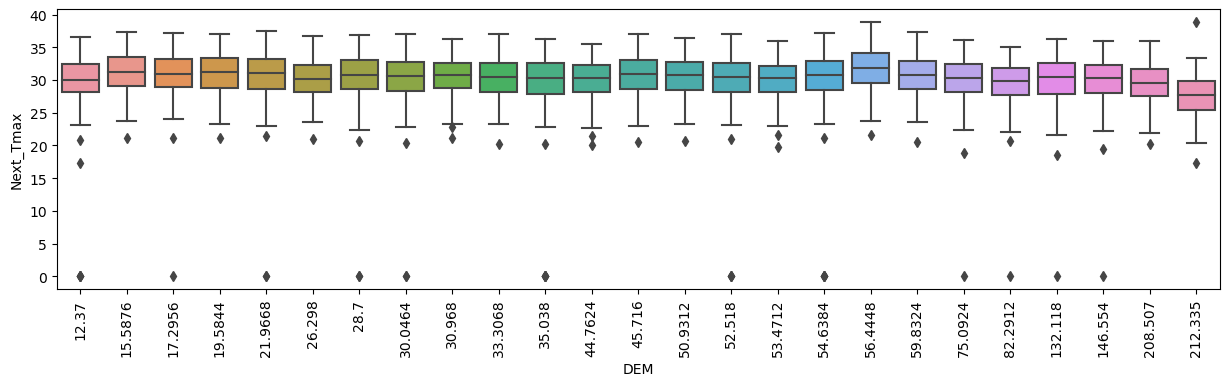

In [33]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='DEM',y='Next_Tmax',data=tp)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '126.826'),
  Text(1, 0, '126.838'),
  Text(2, 0, '126.891'),
  Text(3, 0, '126.909'),
  Text(4, 0, '126.91'),
  Text(5, 0, '126.927'),
  Text(6, 0, '126.937'),
  Text(7, 0, '126.938'),
  Text(8, 0, '126.955'),
  Text(9, 0, '126.97'),
  Text(10, 0, '126.988'),
  Text(11, 0, '126.991'),
  Text(12, 0, '126.995'),
  Text(13, 0, '127.004'),
  Text(14, 0, '127.022'),
  Text(15, 0, '127.024'),
  Text(16, 0, '127.032'),
  Text(17, 0, '127.04'),
  Text(18, 0, '127.042'),
  Text(19, 0, '127.058'),
  Text(20, 0, '127.083'),
  Text(21, 0, '127.085'),
  Text(22, 0, '127.086'),
  Text(23, 0, '127.099'),
  Text(24, 0, '127.135')])

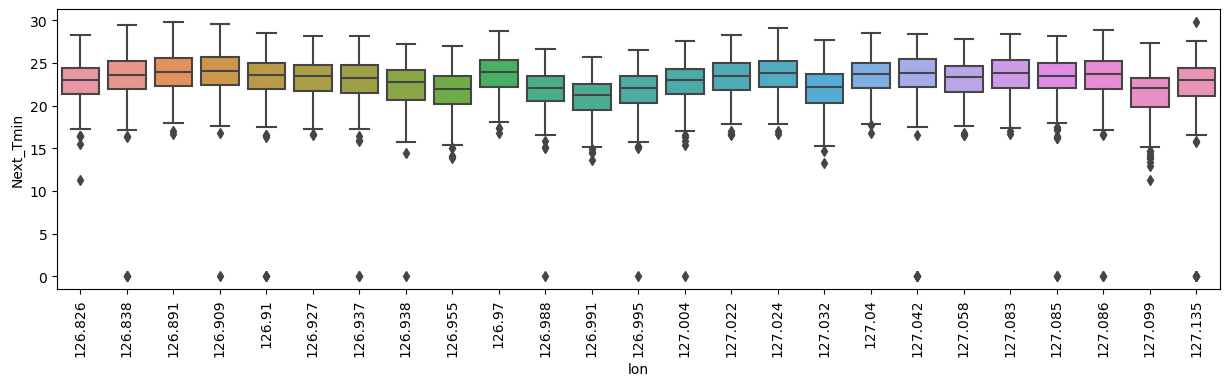

In [32]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=tp)
plt.xticks(rotation=90)

<Axes: title={'center': 'Next day min Temperature Vs Present day min Temperature'}, xlabel='Present_Tmin', ylabel='Next_Tmin'>

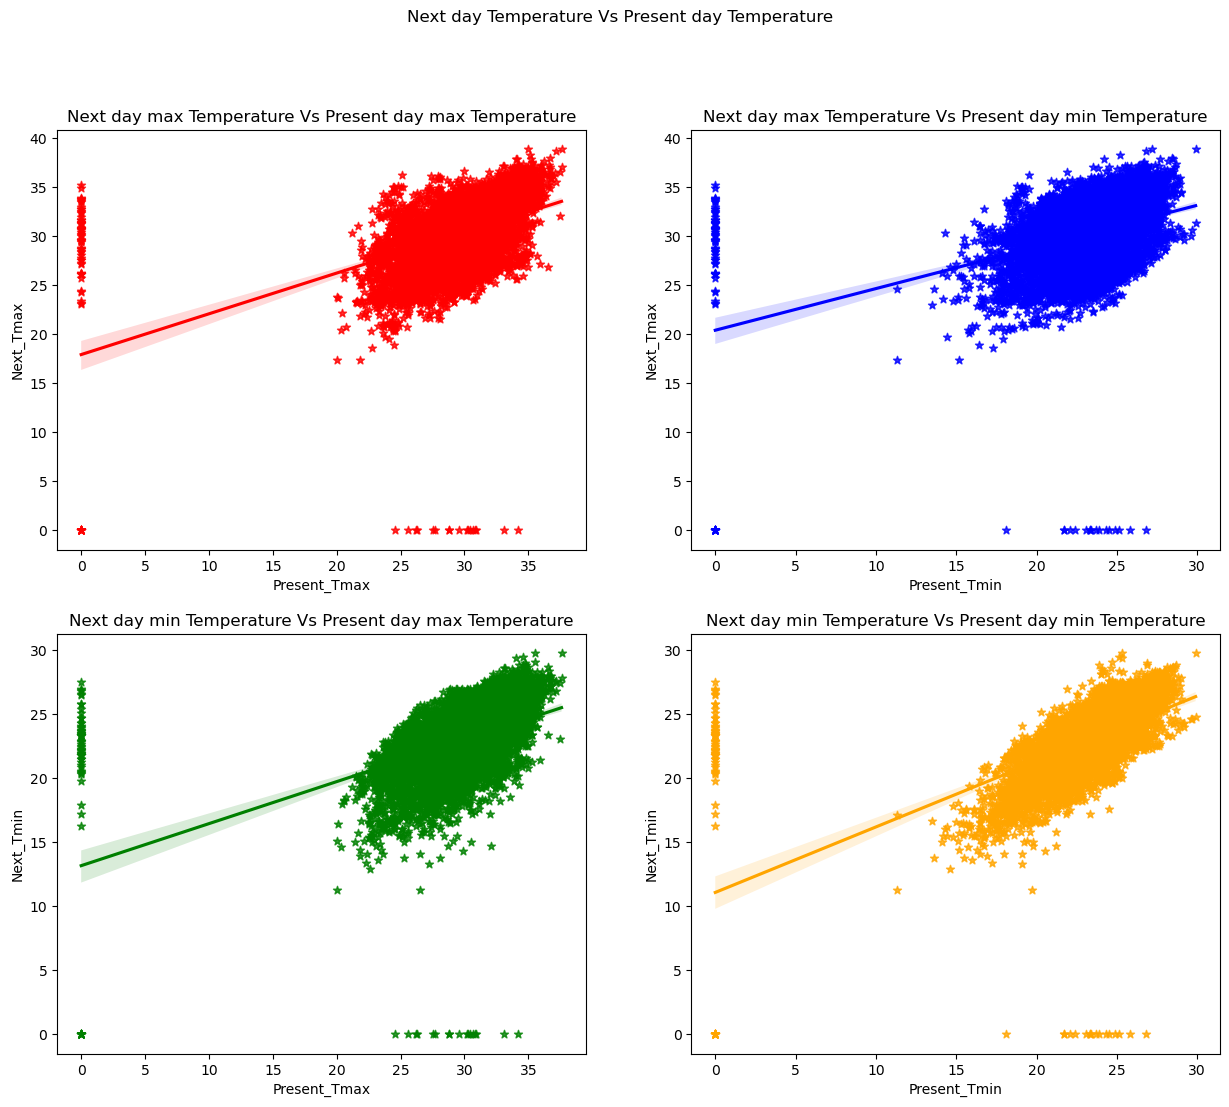

In [35]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Temperature Vs Present day Temperature')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmax',data=tp,marker='*',color='r')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmax',data=tp,marker='*',color='b')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmin',data=tp,marker='*',color='g')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmin',data=tp,marker='*',color='orange')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '12.37'),
  Text(1, 0, '15.5876'),
  Text(2, 0, '17.2956'),
  Text(3, 0, '19.5844'),
  Text(4, 0, '21.9668'),
  Text(5, 0, '26.298'),
  Text(6, 0, '28.7'),
  Text(7, 0, '30.0464'),
  Text(8, 0, '30.968'),
  Text(9, 0, '33.3068'),
  Text(10, 0, '35.038'),
  Text(11, 0, '44.7624'),
  Text(12, 0, '45.716'),
  Text(13, 0, '50.9312'),
  Text(14, 0, '52.518'),
  Text(15, 0, '53.4712'),
  Text(16, 0, '54.6384'),
  Text(17, 0, '56.4448'),
  Text(18, 0, '59.8324'),
  Text(19, 0, '75.0924'),
  Text(20, 0, '82.2912'),
  Text(21, 0, '132.118'),
  Text(22, 0, '146.554'),
  Text(23, 0, '208.507'),
  Text(24, 0, '212.335')])

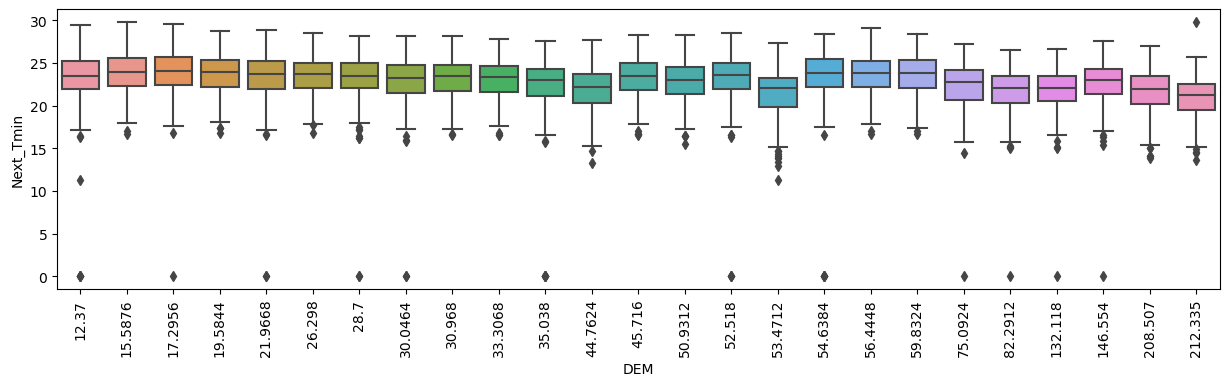

In [34]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
sns.boxplot(x='DEM',y='Next_Tmin',data=tp)
plt.xticks(rotation=90)

<Axes: xlabel='LDAPS_PPT4', ylabel='LDAPS_CC4'>

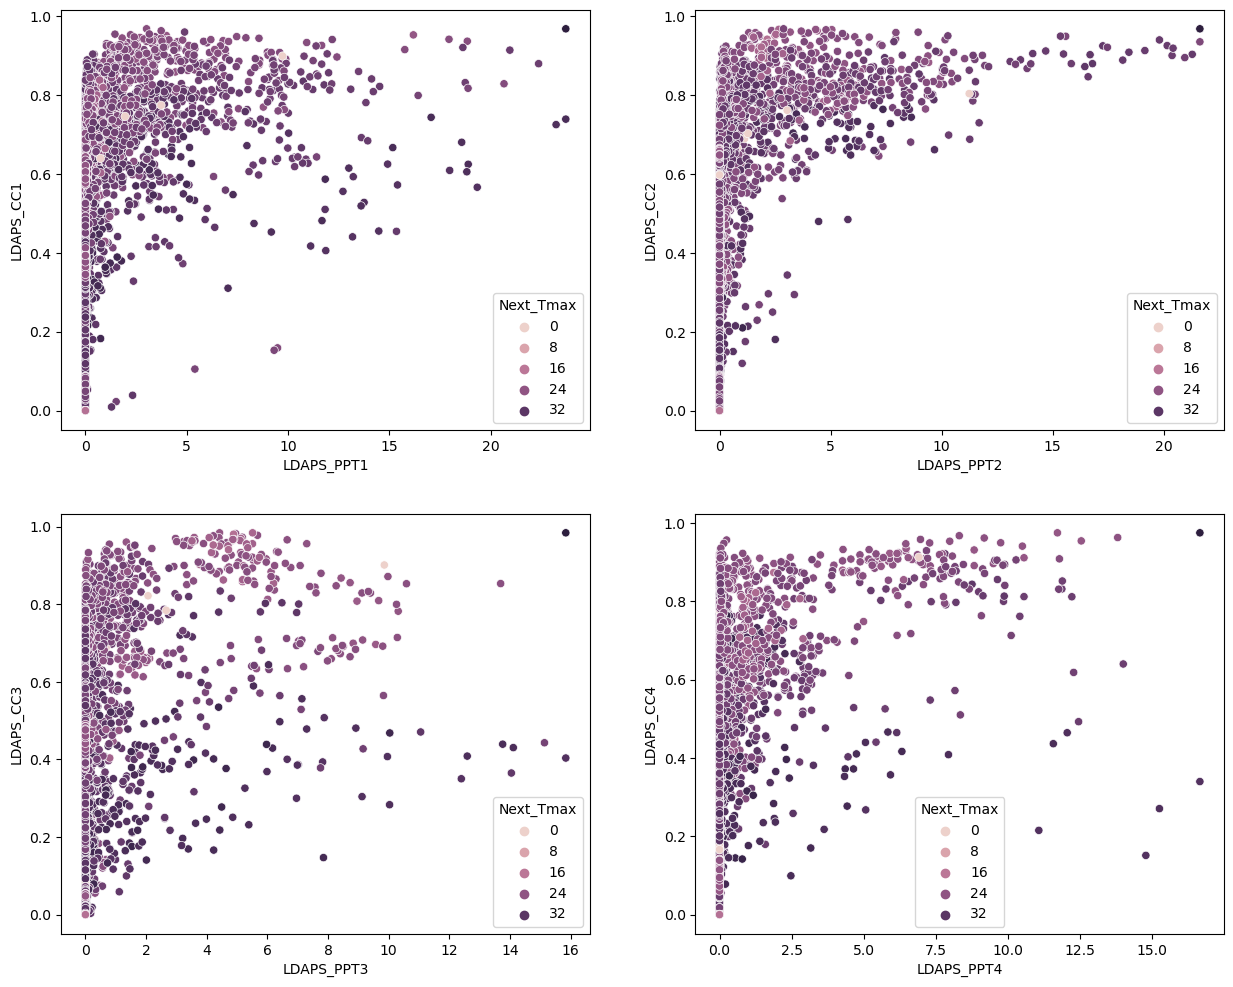

In [39]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.scatterplot(x='LDAPS_PPT1',y='LDAPS_CC1',hue='Next_Tmax',data=tp)

plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_PPT2',y='LDAPS_CC2',hue='Next_Tmax',data=tp)

plt.subplot(2,2,3)
sns.scatterplot(x='LDAPS_PPT3',y='LDAPS_CC3',hue='Next_Tmax',data=tp)

plt.subplot(2,2,4)
sns.scatterplot(x='LDAPS_PPT4',y='LDAPS_CC4',hue='Next_Tmax',data=tp)

<Axes: xlabel='station', ylabel='Next_Tmin'>

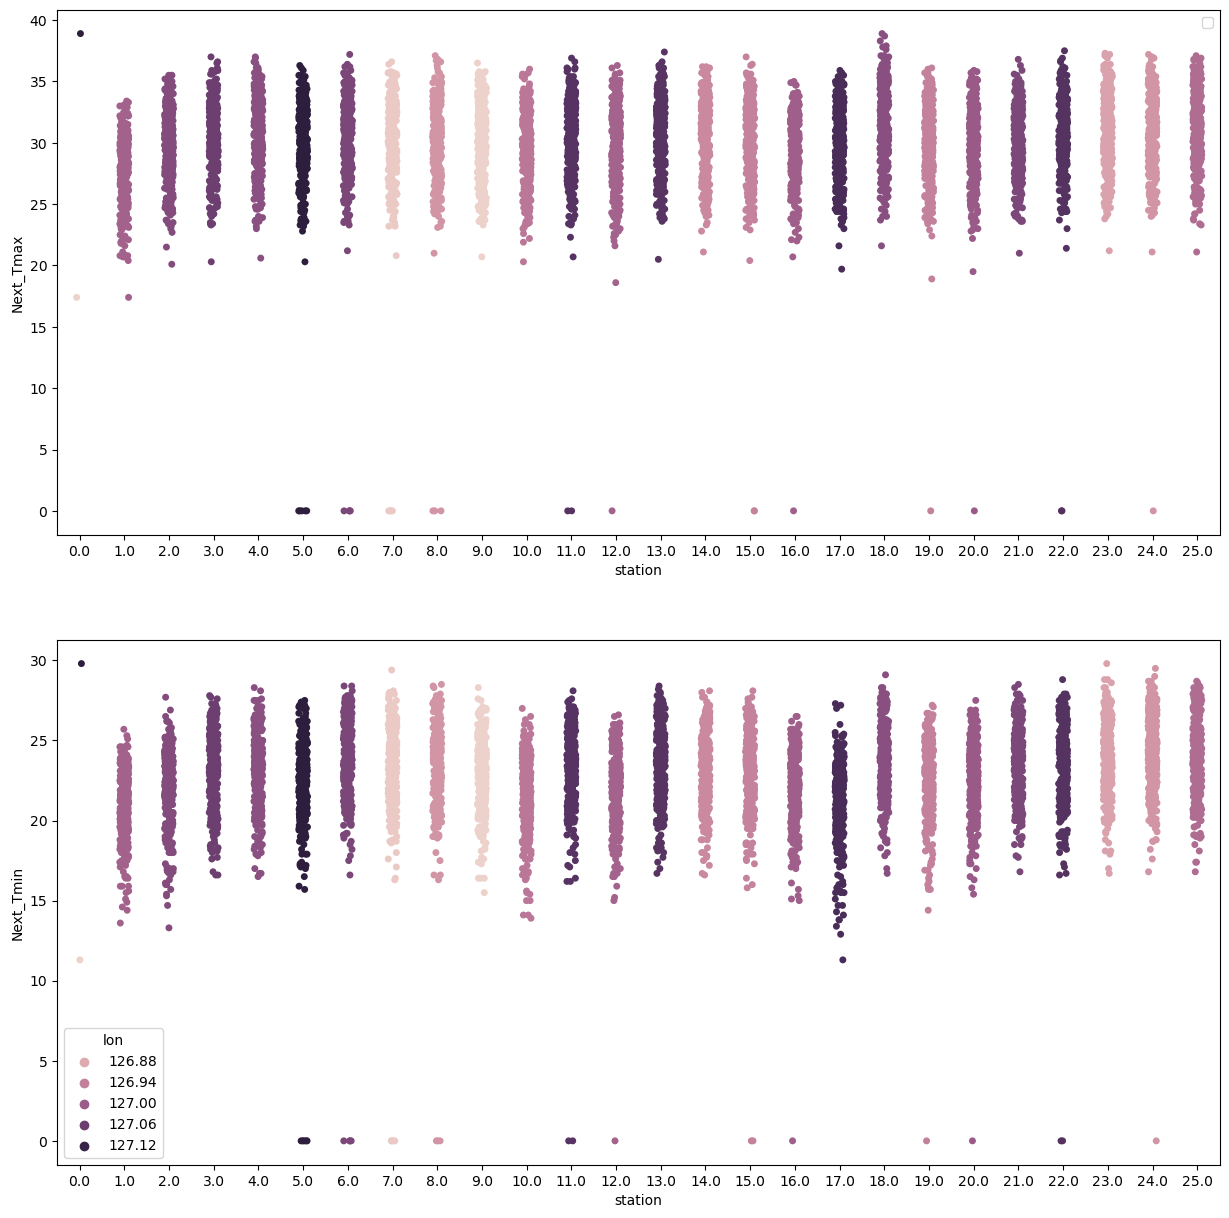

In [37]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.stripplot(x='station',y='Next_Tmax',hue='lon',data=tp)
plt.legend('')

plt.subplot(2,1,2)
sns.stripplot(x='station',y='Next_Tmin',hue='lon',data=tp)

<Axes: xlabel='station', ylabel='Next_Tmin'>

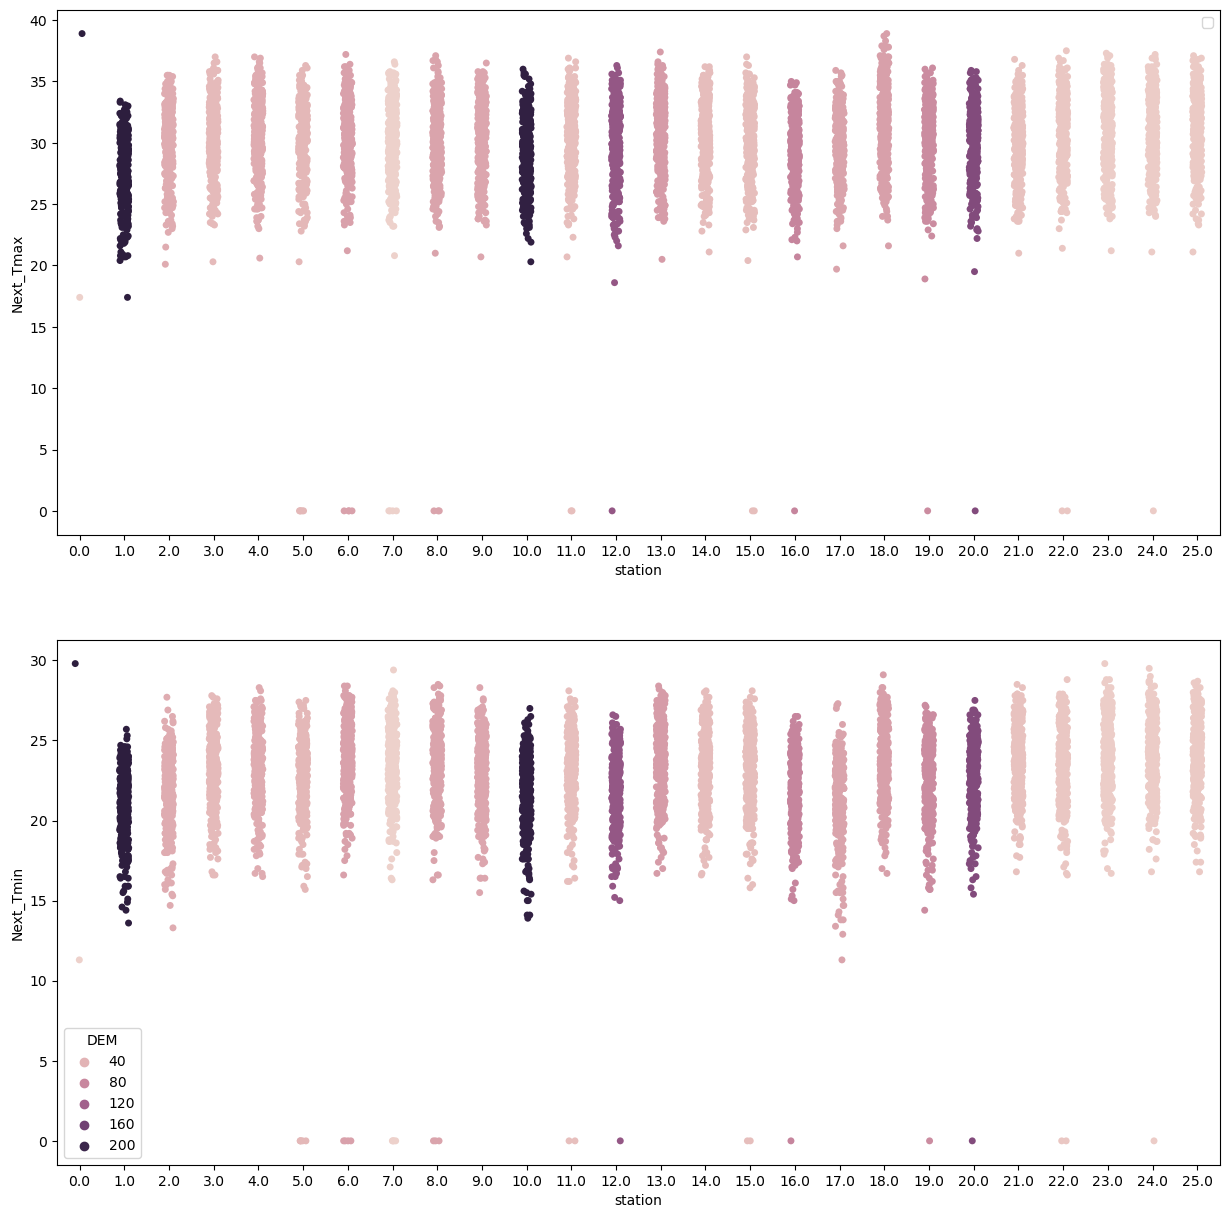

In [38]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.stripplot(x='station',y='Next_Tmax',hue='DEM',data=tp)
plt.legend('')

plt.subplot(2,1,2)
sns.stripplot(x='station',y='Next_Tmin',hue='DEM',data=tp)

<Axes: xlabel='LDAPS_RHmin', ylabel='LDAPS_Tmin_lapse'>

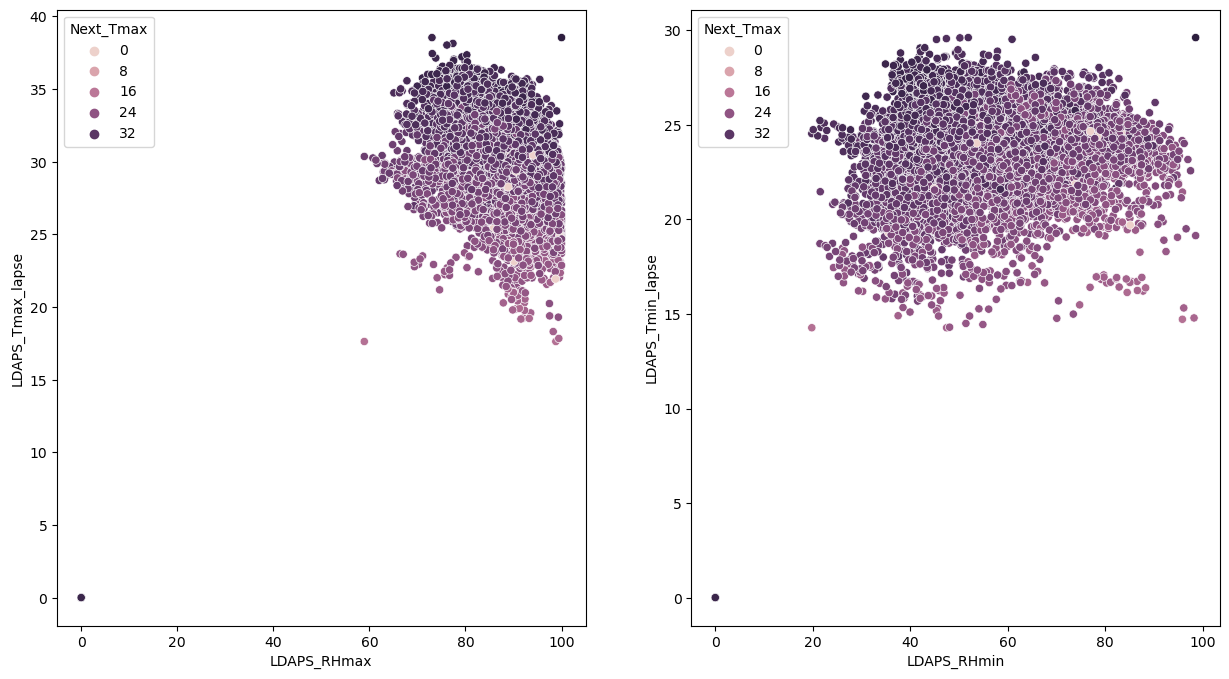

In [41]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.scatterplot(x='LDAPS_RHmax',y='LDAPS_Tmax_lapse',hue='Next_Tmax',data=tp)

plt.subplot(1,2,2)
sns.scatterplot(x='LDAPS_RHmin',y='LDAPS_Tmin_lapse',hue='Next_Tmax',data=tp)

<Axes: xlabel='LDAPS_PPT4', ylabel='LDAPS_CC4'>

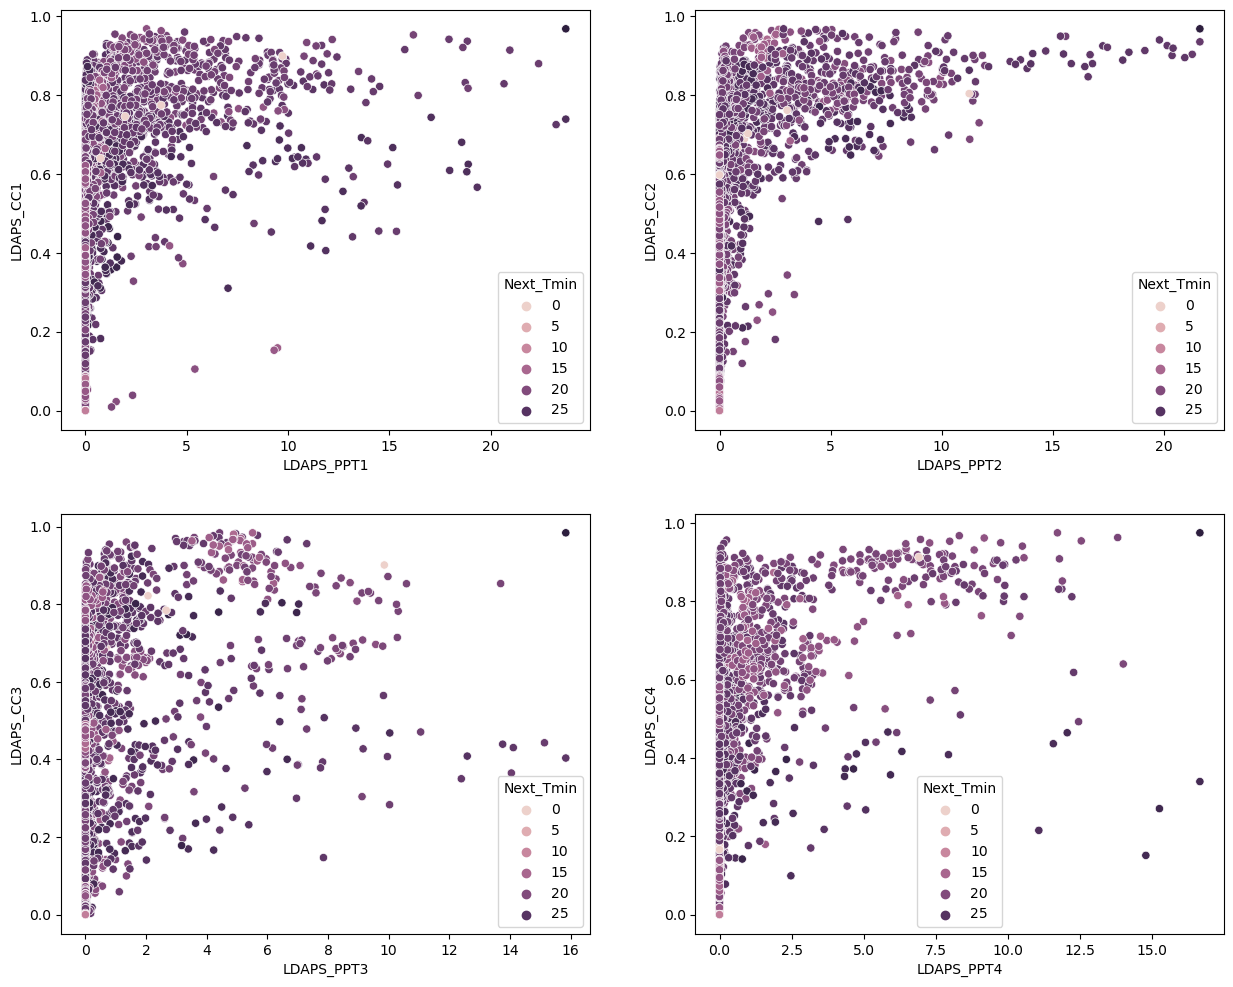

In [40]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.scatterplot(x='LDAPS_PPT1',y='LDAPS_CC1',hue='Next_Tmin',data=tp)

plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_PPT2',y='LDAPS_CC2',hue='Next_Tmin',data=tp)

plt.subplot(2,2,3)
sns.scatterplot(x='LDAPS_PPT3',y='LDAPS_CC3',hue='Next_Tmin',data=tp)

plt.subplot(2,2,4)
sns.scatterplot(x='LDAPS_PPT4',y='LDAPS_CC4',hue='Next_Tmin',data=tp)

<Axes: title={'center': 'Next day min Temperatures Vs Present day min Relative Humidity'}, xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

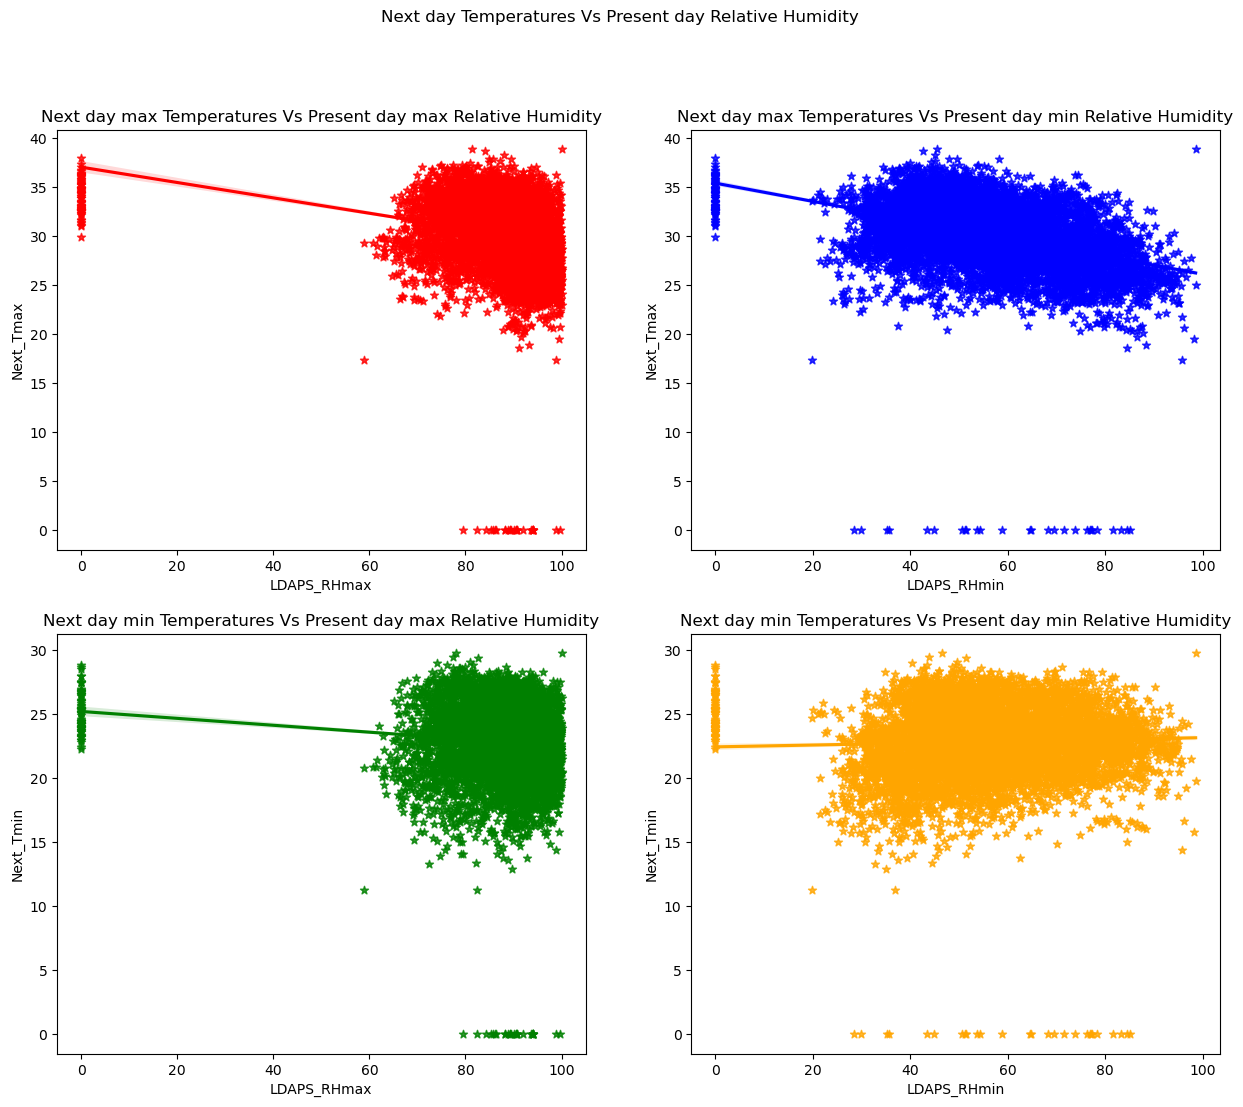

In [36]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Temperatures Vs Present day Relative Humidity')

plt.subplot(2,2,1)
plt.title('Next day max Temperatures Vs Present day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax',y='Next_Tmax',data=tp,marker='*',color='r')

plt.subplot(2,2,2)
plt.title('Next day max Temperatures Vs Present day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin',y='Next_Tmax',data=tp,marker='*',color='b')

plt.subplot(2,2,3)
plt.title('Next day min Temperatures Vs Present day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax',y='Next_Tmin',data=tp,marker='*',color='g')

plt.subplot(2,2,4)
plt.title('Next day min Temperatures Vs Present day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin',y='Next_Tmin',data=tp,marker='*',color='orange')

In [42]:
tp.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.093484      0.109070    -0.062429   
Present_Tmax      0.093484      1.000000      0.796060    -0.167379   
Present_Tmin      0.109070      0.796060      1.000000     0.042678   
LDAPS_RHmin      -0.062429     -0.167379      0.042678     1.000000   
LDAPS_RHmax      -0.106065     -0.190934     -0.087845     0.619118   
LDAPS_Tmax_lapse  0.049270      0.258220      0.181450    -0.125199   
LDAPS_Tmin_lapse  0.074748      0.277778      0.330684     0.309329   
LDAPS_WS          0.003936     -0.104266     -0.056121     0.370372   
LDAPS_LH         -0.131658      0.091490     -0.018650    -0.001355   
LDAPS_CC1         0.006642     -0.232985      0.047237     0.616968   
LDAPS_CC2         0.003128     -0.171536      0.042993     0.738195   
LDAPS_CC3         0.000361     -0.126714     -0.029631     0.683737   
LDAPS_CC4         0.005734     -0.129399     -0.064573     0.518152   
LDAPS_PPT1       -0.005411     -0.077180      0.083750     0.256015   
LDAPS_PPT2       -0.010980     -0.075777      0.045526     0.374882   
LDAPS_PPT3       -0.015526     -0.086998     -0.034823     0.233215   
LDAPS_PPT4       -0.013516     -0.082853     -0.057832     0.165342   
lat              -0.237456     -0.030749     -0.050726     0.081402   
lon              -0.118591      0.011455     -0.027258    -0.071251   
DEM              -0.256155     -0.132419     -0.181700     0.095443   
Slope            -0.090492     -0.064182     -0.095836     0.115658   
Solar radiation  -0.018798     -0.024520      0.033574     0.245973   
Next_Tmax         0.103471      0.471320      0.384234    -0.403276   
Next_Tmin         0.122164      0.473728      0.588769     0.039808   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.106065          0.049270          0.074748  0.003936   
Present_Tmax        -0.190934          0.258220          0.277778 -0.104266   
Present_Tmin        -0.087845          0.181450          0.330684 -0.056121   
LDAPS_RHmin          0.619118         -0.125199          0.309329  0.370372   
LDAPS_RHmax          1.000000          0.372350          0.489207  0.316808   
LDAPS_Tmax_lapse     0.372350          1.000000          0.824795  0.002716   
LDAPS_Tmin_lapse     0.489207          0.824795          1.000000  0.125638   
LDAPS_WS             0.316808          0.002716          0.125638  1.000000   
LDAPS_LH             0.287786          0.159654          0.031520  0.060898   
LDAPS_CC1            0.381210         -0.212644          0.103823  0.314795   
LDAPS_CC2            0.350814         -0.274477          0.128112  0.287388   
LDAPS_CC3            0.239198         -0.294763          0.056062  0.267462   
LDAPS_CC4            0.171274         -0.222670          0.023888  0.243670   
LDAPS_PPT1           0.194093         -0.057927          0.048090  0.154384   
LDAPS_PPT2           0.166798         -0.153120          0.019615  0.190944   
LDAPS_PPT3           0.103924         -0.117201         -0.046515  0.161133   
LDAPS_PPT4           0.092030         -0.098521         -0.051957  0.143897   
lat                  0.124812         -0.029935         -0.068535  0.034917   
lon                  0.016358          0.064481         -0.019014 -0.056643   
DEM                  0.112953         -0.127217         -0.139151  0.181986   
Slope                0.140001         -0.115436         -0.132310  0.163485   
Solar radiation      0.133827          0.069409          0.149156  0.131265   
Next_Tmax           -0.244316          0.440702          0.285218 -0.320432   
Next_Tmin           -0.107132          0.314810          0.491376 -0.109601   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.131658   0.006642  ...   -0.010980   -0.015526   
Present_Tmax      0.091490  -0.232985  ...   -0.075777   -0.086998   
Present_Tmin     -0.018650   0.047237  ...    0.045526   

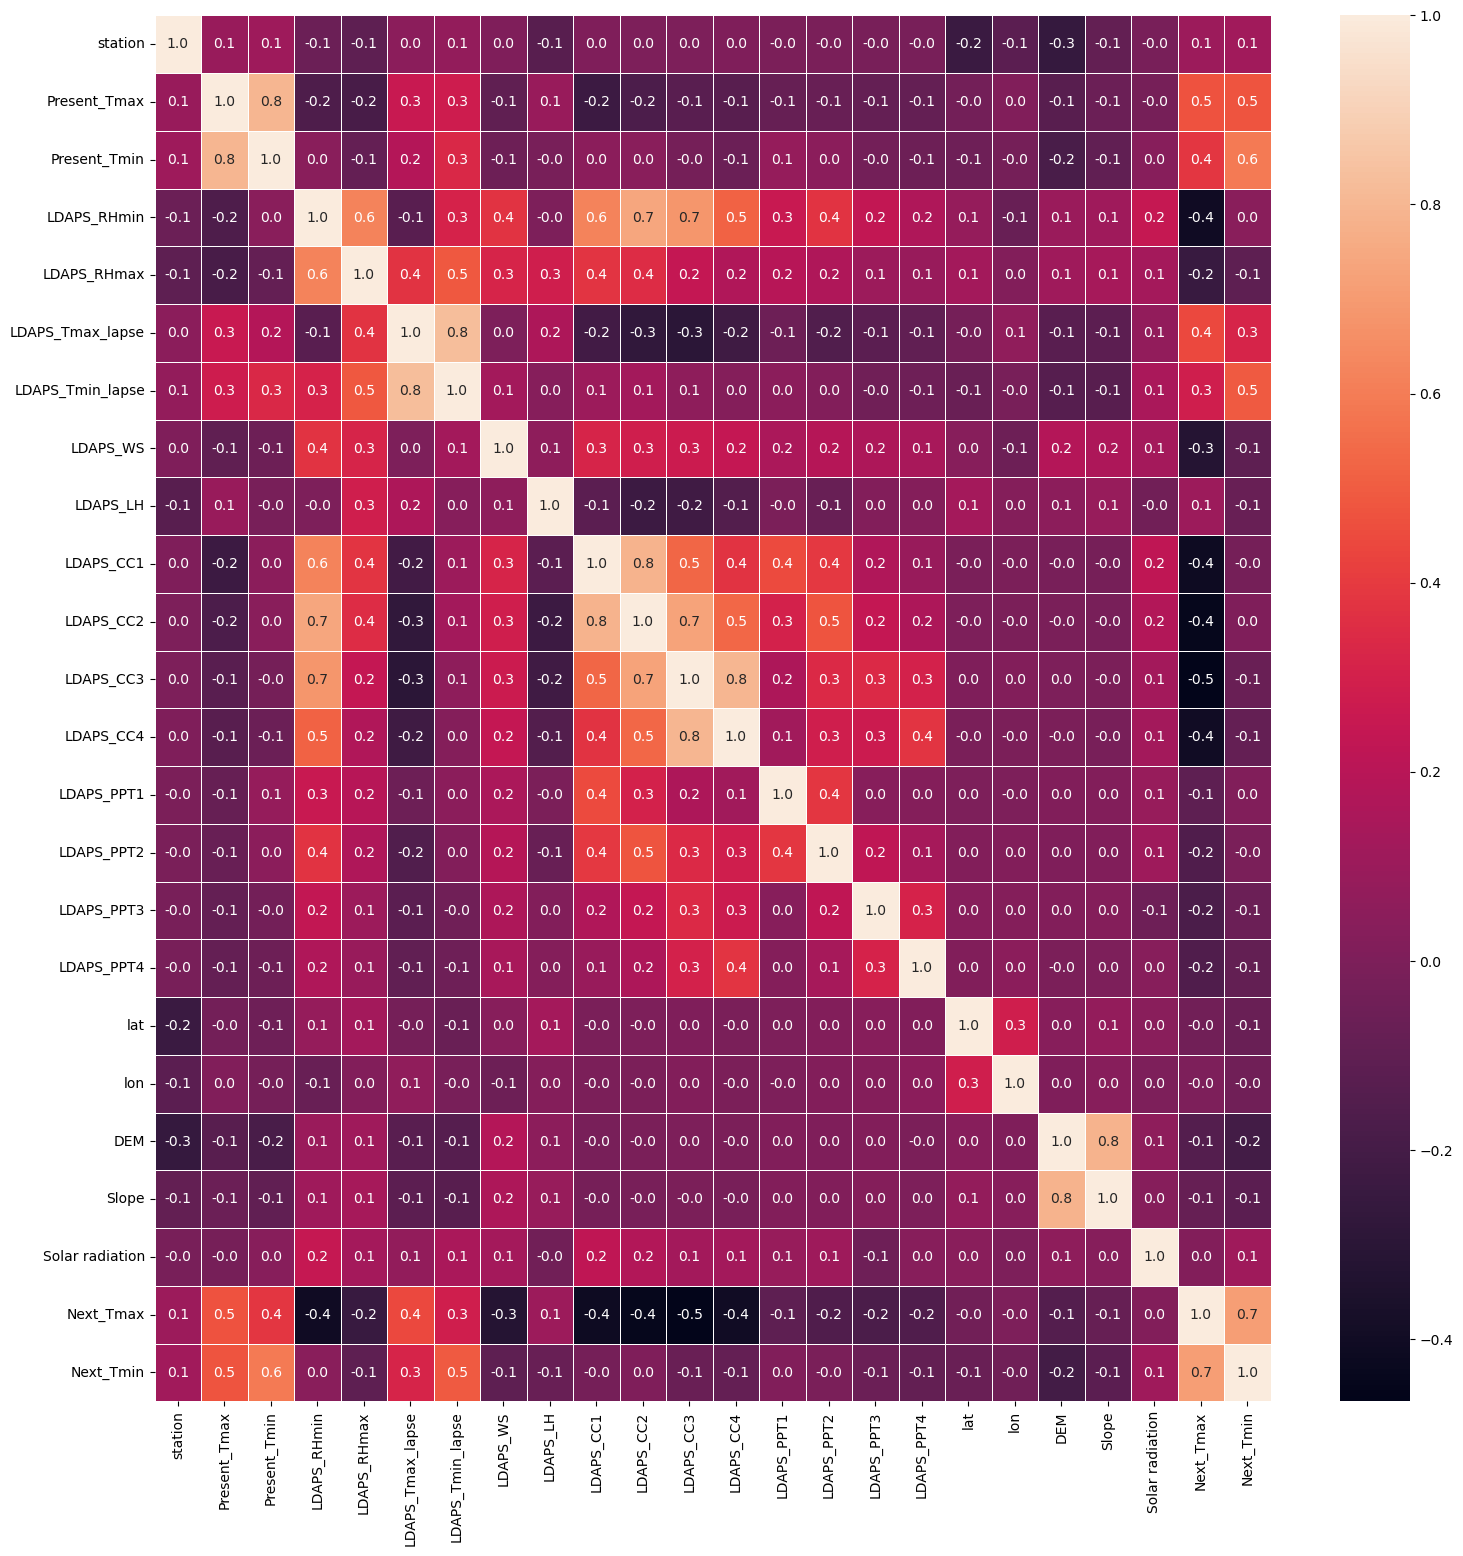

In [43]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(tp.corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)
plt.show()

# Encoding

In [44]:
columns_to_convert = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 
                      'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 
                      'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 
                      'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']

tp[columns_to_convert] = tp[columns_to_convert].astype(int)

# Train and Test

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings ('ignore')

# Maximum temperature

In [46]:
xmax = tp[['Present_Tmax','Present_Tmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 
        'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation']]
ymax = tp['Next_Tmax']

In [47]:
xmax.shape

(7752, 19)

In [48]:
ymax.shape

(7752,)

In [49]:
ymax.value_counts()

29    923
31    898
30    892
32    875
33    758
28    722
34    520
27    516
26    439
25    363
35    264
24    224
23    139
36     94
22     31
0      27
37     23
21     17
20     17
38      4
17      2
18      2
19      2
Name: Next_Tmax, dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xmax=scaler.fit_transform(xmax)
xmax

array([[-0.25891086, -0.48438727,  0.35551177, ...,  2.7728197 ,
         0.90371478,  1.51701527],
       [ 0.47970923, -0.48438727,  0.26617863, ..., -0.3198125 ,
        -0.60302723,  1.23038879],
       [ 0.47970923,  0.13254695, -0.35915331, ..., -0.52230628,
        -0.60302723,  1.21640701],
       ...,
       [-1.48994435, -1.71825572, -0.89515213, ..., -0.78002563,
        -0.60302723, -2.07397179],
       [-2.22856444, -3.56905838, -2.59248169, ..., -0.9088853 ,
        -0.60302723, -2.35826797],
       [ 1.95694942,  1.98334961,  1.15950998, ...,  2.7728197 ,
         3.16382778,  1.51701527]])

In [51]:
xmaxtrain,xmaxtest,ymaxtrain,ymaxtest=train_test_split(xmax,ymax,test_size=0.2,random_state=42)

In [52]:
xmaxtrain.shape

(6201, 19)

In [53]:
xmaxtest.shape

(1551, 19)

In [54]:
ymaxtrain.shape

(6201,)

In [55]:
ymaxtest.shape

(1551,)

In [56]:
lm=LinearRegression()
lm.fit(xmaxtrain,ymaxtrain)

LinearRegression()

In [57]:
lm.coef_

array([ 3.79247563e-01,  5.59870551e-01, -1.40047820e+00,  1.86739184e+00,
       -6.86822794e-01,  4.90057856e-01,  1.11022302e-16, -2.22044605e-16,
       -4.44089210e-16,  1.66533454e-16,  6.87817846e-02,  1.02460232e-01,
       -1.05295635e-01, -9.14870240e-02,  0.00000000e+00,  5.99971529e-03,
       -1.79583082e-01,  4.10035018e-01,  2.27270982e-01])

In [58]:
lm.intercept_

29.70323797285348

In [59]:
lm.score(xmaxtrain,ymaxtrain)

0.5094656128100072

In [60]:
knn = KNeighborsRegressor()
knn.fit(xmaxtrain, ymaxtrain)

KNeighborsRegressor()

In [61]:
predknn=knn.predict(xmaxtest)
predknn

array([27.2, 34.8, 25.6, ..., 29. , 25.2, 28.4])

In [62]:
knn.score(xmaxtrain,ymaxtrain)

0.6959113404419197

In [63]:
sv=SVC()
sv.fit(xmaxtrain,ymaxtrain)

SVC()

In [64]:
predsv=sv.predict(xmaxtest)
predsv

array([28, 34, 27, ..., 29, 25, 26])

In [65]:
sv.score(xmaxtrain,ymaxtrain)

0.4207385905499113

In [131]:
predtpmax=knn.predict(xmaxtest)
predtpmax

array([19.6, 27. , 21. , ..., 23. , 20. , 22.6])

In [67]:
predicted = list(knn.predict(xmaxtest))
original = list(ymaxtest)

In [68]:
predicted_df = pd.DataFrame({'predicted': predicted, 'original': original})
pd.DataFrame(predicted_df)

predicted  original
0          27.2        28
1          34.8        35
2          25.6        25
3          32.2        35
4          31.6        33
...         ...       ...
1546       32.0        32
1547       30.6        31
1548       29.0        28
1549       25.2        25
1550       28.4        30

[1551 rows x 2 columns]

In [69]:
predicted = [int(value) for value in predicted]
original = [int(value) for value in original]
predicted_tp = pd.DataFrame({'predicted': predicted, 'original': original})
print(predicted_tp)

      predicted  original
0            27        28
1            34        35
2            25        25
3            32        35
4            31        33
...         ...       ...
1546         32        32
1547         30        31
1548         29        28
1549         25        25
1550         28        30

[1551 rows x 2 columns]


# Minimum temperature

In [98]:
xmin = tp[['Present_Tmax','Present_Tmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 
        'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation']]
ymin = tp['Next_Tmin']

In [99]:
xmin.shape

(7752, 19)

In [100]:
ymin.shape

(7752,)

In [102]:
ymin.value_counts()

23    1398
22    1131
24    1112
21     880
20     737
25     691
26     558
19     403
27     283
18     223
17     129
16      69
28      48
15      37
0       27
14      11
29       6
13       6
11       2
12       1
Name: Next_Tmin, dtype: int64

In [103]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xmin=scaler.fit_transform(xmin)
xmin

array([[-0.25891086, -0.48438727,  0.35551177, ...,  2.7728197 ,
         0.90371478,  1.51701527],
       [ 0.47970923, -0.48438727,  0.26617863, ..., -0.3198125 ,
        -0.60302723,  1.23038879],
       [ 0.47970923,  0.13254695, -0.35915331, ..., -0.52230628,
        -0.60302723,  1.21640701],
       ...,
       [-1.48994435, -1.71825572, -0.89515213, ..., -0.78002563,
        -0.60302723, -2.07397179],
       [-2.22856444, -3.56905838, -2.59248169, ..., -0.9088853 ,
        -0.60302723, -2.35826797],
       [ 1.95694942,  1.98334961,  1.15950998, ...,  2.7728197 ,
         3.16382778,  1.51701527]])

In [104]:
xmintrain,xmintest,ymintrain,ymintest=train_test_split(xmin,ymin,test_size=0.2,random_state=42)

In [105]:
xmintrain.shape

(6201, 19)

In [106]:
ymintrain.shape

(6201,)

In [107]:
xmintest.shape

(1551, 19)

In [108]:
ymintest.shape

(1551,)

In [109]:
lm=LinearRegression()
lm.fit(xmintrain,ymintrain)

LinearRegression()

In [110]:
lm.coef_

array([-2.63792879e-01,  1.60699983e+00, -4.72900409e-01,  8.48413015e-01,
       -8.65510510e-02, -1.37650846e-01,  5.55111512e-17,  0.00000000e+00,
       -8.32667268e-17,  1.11022302e-16,  2.20379682e-02,  5.56330800e-02,
        3.49768183e-02, -9.55109196e-02,  0.00000000e+00, -1.43731660e-02,
       -4.03100532e-01,  3.33771369e-01,  3.03288484e-01])

In [111]:
lm.intercept_

22.39401825391083

In [112]:
lm.score(xmintrain,ymintrain)

0.43893909306668044

In [119]:
kn = KNeighborsRegressor()
kn.fit(xmintrain, ymintrain)

KNeighborsRegressor()

In [120]:
predkn=knn.predict(xmintest)
predkn

array([19.6, 27. , 21. , ..., 23. , 20. , 22.6])

In [121]:
kn.score(xmintrain,ymintrain)

0.6910843802728723

In [124]:
svc=SVC()
svc.fit(xmintrain,ymintrain)

SVC()

In [125]:
predsvc=svc.predict(xmintest)
predsvc

array([20, 26, 21, ..., 25, 20, 23])

In [127]:
svc.score(xmintrain,ymintrain)

0.4302531849701661

In [135]:
Predicted = list(kn.predict(xmintest))
Original = list(ymintest)

In [136]:
predicted_df = pd.DataFrame({'Predicted': Predicted, 'Original': Original})
pd.DataFrame(predicted_df)

Predicted  Original
0          19.6        20
1          27.0        27
2          21.0        21
3          23.8        25
4          25.4        26
...         ...       ...
1546       22.4        21
1547       23.0        22
1548       23.0        22
1549       20.0        19
1550       22.6        21

[1551 rows x 2 columns]

In [137]:
Predicted = [int(value) for value in Predicted]
Original = [int(value) for value in Original]
predictedtp = pd.DataFrame({'Predicted': Predicted, 'Original': Original})
print(predictedtp)

      Predicted  Original
0            19        20
1            27        27
2            21        21
3            23        25
4            25        26
...         ...       ...
1546         22        21
1547         23        22
1548         23        22
1549         20        19
1550         22        21

[1551 rows x 2 columns]


# Hyperparameter Tuning

In [138]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [139]:
import numpy as np
alpha_min = 0.1
alpha_max = 1
num_values = 10
alphas = np.logspace(np.log10(alpha_min), np.log10(alpha_max), num=num_values)

print("Alpha values:", alphas)

Alpha values: [0.1        0.12915497 0.16681005 0.21544347 0.27825594 0.35938137
 0.46415888 0.59948425 0.77426368 1.        ]


In [143]:
alphavalue = {'alpha': [0.1, 0.12915497, 0.16681005, 0.21544347, 0.27825594, 0.35938137,
 0.46415888, 0.59948425, 0.77426368, 1.]}

model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=alphavalue, cv=5)
grid.fit(xmax, xmin)

print("Best score:", grid.best_score_)
print("Best estimator alpha:", grid.best_estimator_.alpha)
print("Best params:", grid.best_params_)

Best score: 0.9999999995570683
Best estimator alpha: 0.1
Best params: {'alpha': 0.1}


In [144]:
import os

model_file = 'best_model.pkl'
if os.path.exists(model_file):
    print("Best model is saved as", model_file)
else:
    print("Failed to save the model.")

Best model is saved as best_model.pkl


# Overview 
The project aims to develop machine learning models for predicting next-day maximum and minimum air temperatures over Seoul, South Korea. The dataset provided contains information from 2013 to 2017, primarily comprising forecast data from the LDAPS (Land Data Assimilation System) model operated by the Korea Meteorological Administration, along with in-situ temperature measurements and geographic auxiliary variables.

# Data Description
The dataset includes various features, primarily derived from the LDAPS model's next-day forecast data, in-situ measurements of present-day maximum and minimum temperatures, and geographic auxiliary variables. These features encompass a range of meteorological parameters such as relative humidity, wind speed, cloud cover, precipitation, as well as geographic attributes like latitude, longitude, elevation, slope, and solar radiation.

The attributes of interest include:

Station: Weather station number ranging from 1 to 25.
Date: Representing the present day in the format yyyy-mm-dd, covering the period from '2013-06-30' to '2017-08-30'.
Present_Tmax and Present_Tmin: Present-day maximum and minimum air temperatures recorded between 0 and 21 hours (°C).
Various LDAPS model forecasts including relative humidity (LDAPS_RHmin and LDAPS_RHmax), maximum and minimum air temperatures with applied lapse rates (LDAPS_Tmax_lapse and LDAPS_Tmin_lapse), wind speed (LDAPS_WS), latent heat flux (LDAPS_LH), cloud cover for four 6-hour intervals (LDAPS_CC1-4), and precipitation for four 6-hour intervals (LDAPS_PPT1-4).
Geographic attributes such as latitude, longitude, elevation (DEM), slope, and solar radiation.
The target variables for prediction are:

Next_Tmax: The next-day maximum air temperature (°C), ranging from 17.4 to 38.9.
Next_Tmin: The next-day minimum air temperature (°C), ranging from 11.3 to 29.8.

# Model Selection and Training:
A variety of machine learning models were explored, such as linear regression, k-neighbors regressor, and support vector classifier. These models were selected for their capacity to handle regression and classification tasks and their flexibility in capturing complex relationships within the data. Prior to training, the dataset was partitioned into training and testing subsets using the train_test_split function from the scikit-learn library, ensuring robust model evaluation and performance assessment.

# Hyperparameter Tuning:
Hyperparameter tuning was performed for some models to optimize their performance. This process involved selecting the best values for the hyperparameters using techniques such as grid search or randomized search. Evaluation metrics were used to compare different models and select the best-performing one.

# Evaluation Metrics:
The performance of the trained models was evaluated using appropriate evaluation metrics. These metrics provide insights into how well the models are able to predict the next day maximum and minimum temperature based on the given features.